# 10주차: 09장 데이터분석 프로젝트

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

In [4]:
pd.set_option('display.precision', 2)

In [5]:
%config InlineBackend.figure_format = 'retina'

In [6]:
!pip install pyreadstat

In [7]:
raw_welfare = pd.read_spss('data/Koweps_hpwc14_2019_beta2.sav')
raw_welfare

,h14_id,h14_ind,h14_sn,h14_merkey,h_new,h14_cobf,p14_wsc,p14_wsl,p14_wgc,p14_wgl,...,wc14_64,wc14_65,wc14_5aq4,wc14_5aq5,wc14_5aq6,h14_pers_income1,h14_pers_income2,h14_pers_income3,h14_pers_income4,h14_pers_income5
0,2.0,1.0,1.0,2.01e+04,0.0,NaN,0.29,0.29,1307.76,1307.76,...,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
1,3.0,1.0,1.0,3.01e+04,0.0,NaN,0.42,0.42,1882.57,1882.57,...,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
2,4.0,1.0,1.0,4.01e+04,0.0,NaN,0.27,0.27,1189.69,1192.91,...,NaN,,NaN,NaN,NaN,NaN,1284.0,NaN,0.0,NaN
3,6.0,1.0,1.0,6.01e+04,0.0,NaN,0.49,0.50,2219.63,2224.27,...,1.0,.,2.0,4.0,4.0,2304.0,NaN,1800.0,0.0,NaN
4,6.0,1.0,1.0,6.01e+04,0.0,NaN,1.02,1.02,4565.39,4565.39,...,1.0,.,1.0,5.0,2.0,NaN,NaN,NaN,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14413,9800.0,7.0,1.0,9.80e+07,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
14414,9800.0,7.0,1.0,9.80e+07,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
14415,9800.0,7.0,1.0,9.80e+07,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,,NaN,NaN,NaN,NaN,208.0,NaN,0.0,NaN
14416,9800.0,7.0,1.0,9.80e+07,1.0,NaN,NaN,NaN,NaN,NaN,...,5.0,.,4.0,3.0,3.0,NaN,1200.0,NaN,0.0,NaN


In [8]:
raw_welfare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14418 entries, 0 to 14417
Columns: 830 entries, h14_id to h14_pers_income5
dtypes: float64(826), object(4)
memory usage: 91.3+ MB


In [9]:
welfare = raw_welfare.copy()
welfare.shape

(14418, 830)

In [10]:
welfare = welfare.rename(columns= {'h14_g3': 'sex', 
                                   'h14_g4': 'birth',
                                   'h14_g10': 'marriage_type',
                                   'h14_g11': 'religion',
                                   'p1402_8aq1': 'income',
                                   'h14_eco9': 'code_job',
                                   'h14_reg7': 'code_region'})
welfare['sex']

0        2.0
1        1.0
2        1.0
3        1.0
4        2.0
        ... 
14413    2.0
14414    2.0
14415    1.0
14416    2.0
14417    1.0
Name: sex, Length: 14418, dtype: float64

In [11]:
welfare.sex.dtypes

dtype('float64')

In [12]:
welfare.sex.value_counts()

sex
2.0    7913
1.0    6505
Name: count, dtype: int64

In [13]:
welfare.sex.isna().sum()

0

In [14]:
welfare['sex'] = np.where(welfare.sex == 1, 'male', 'female')
welfare['sex'].value_counts()

sex
female    7913
male      6505
Name: count, dtype: int64

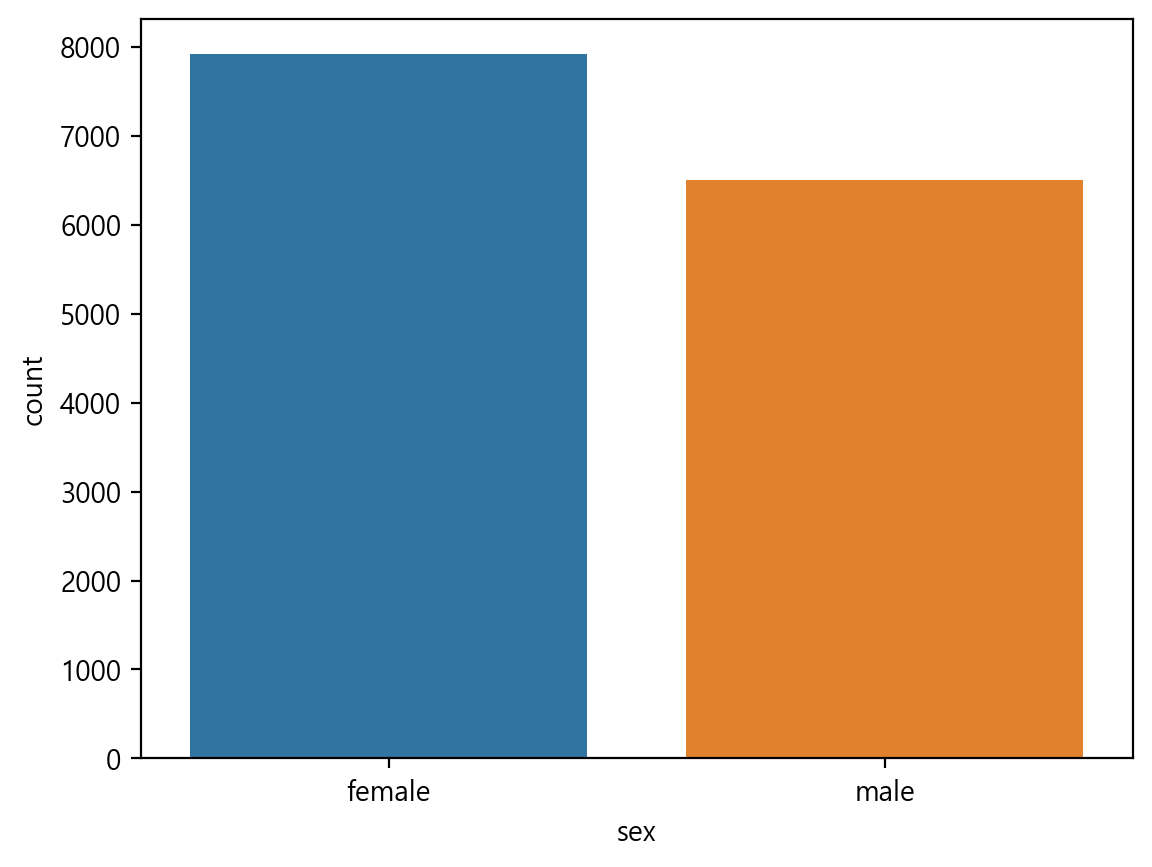

In [15]:
sns.countplot(welfare, x='sex', hue='sex');

In [16]:

welfare['income'].dtypes

dtype('float64')

In [17]:
welfare['income'].describe()

count    4534.00
mean      268.46
std       198.02
min         0.00
25%       150.00
50%       220.00
75%       345.75
max      1892.00
Name: income, dtype: float64

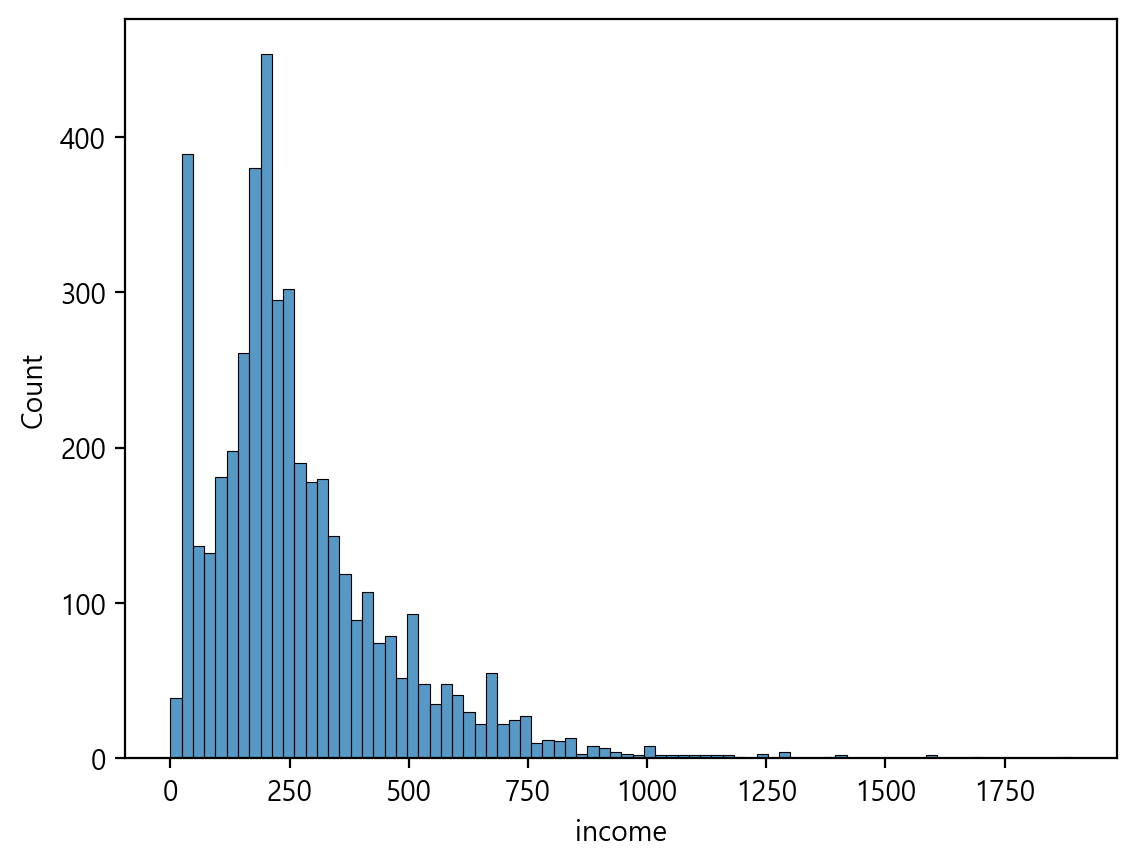

In [18]:
sns.histplot(welfare, x='income');

In [19]:
welfare['income'].isna().sum()

9884

In [20]:
sex_income = welfare.groupby('sex', as_index=False) \
                    .agg(mean_income = ('income', 'mean'))
sex_income

,sex,mean_income
0,female,186.29
1,male,349.04


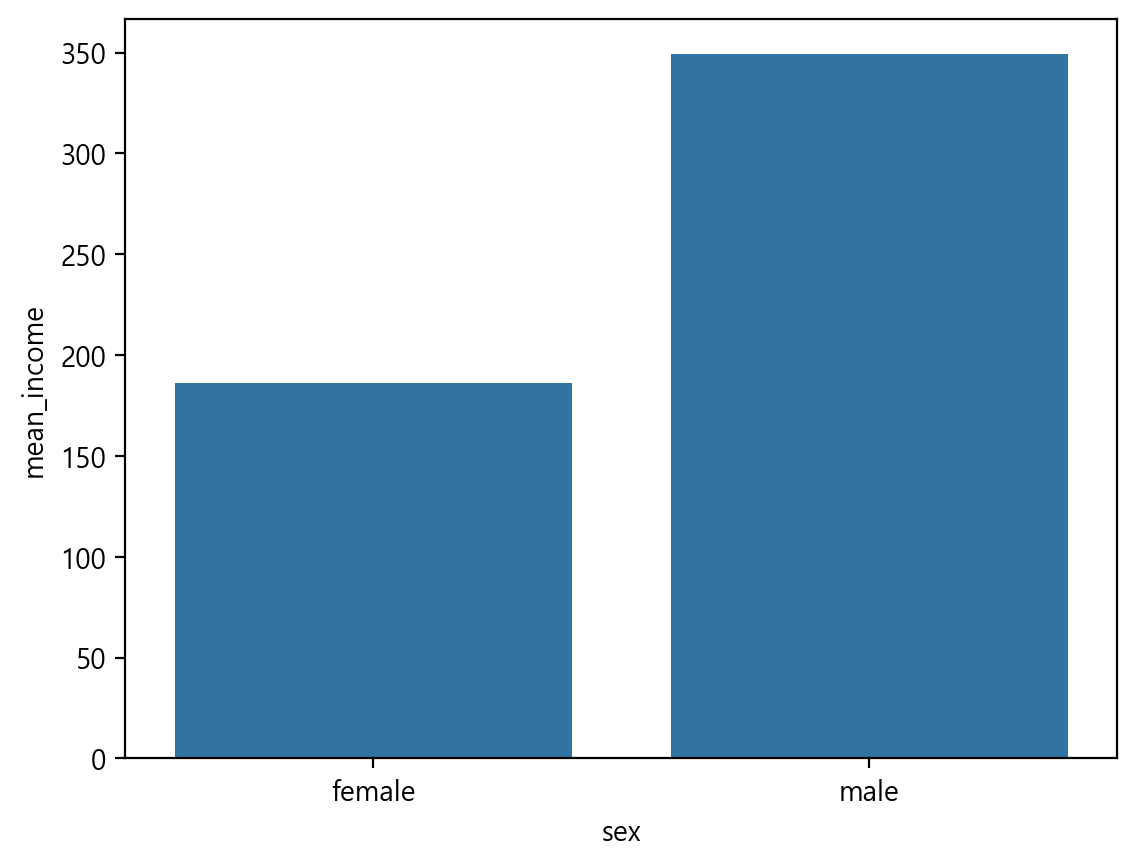

In [21]:
sns.barplot(sex_income, x='sex', y='mean_income');

## 나이와 월급의 관계

In [22]:
welfare['birth'].dtypes

dtype('float64')

In [23]:
welfare['birth'].describe()

count    14418.00
mean      1969.28
std         24.40
min       1907.00
25%       1948.00
50%       1968.00
75%       1990.00
max       2018.00
Name: birth, dtype: float64

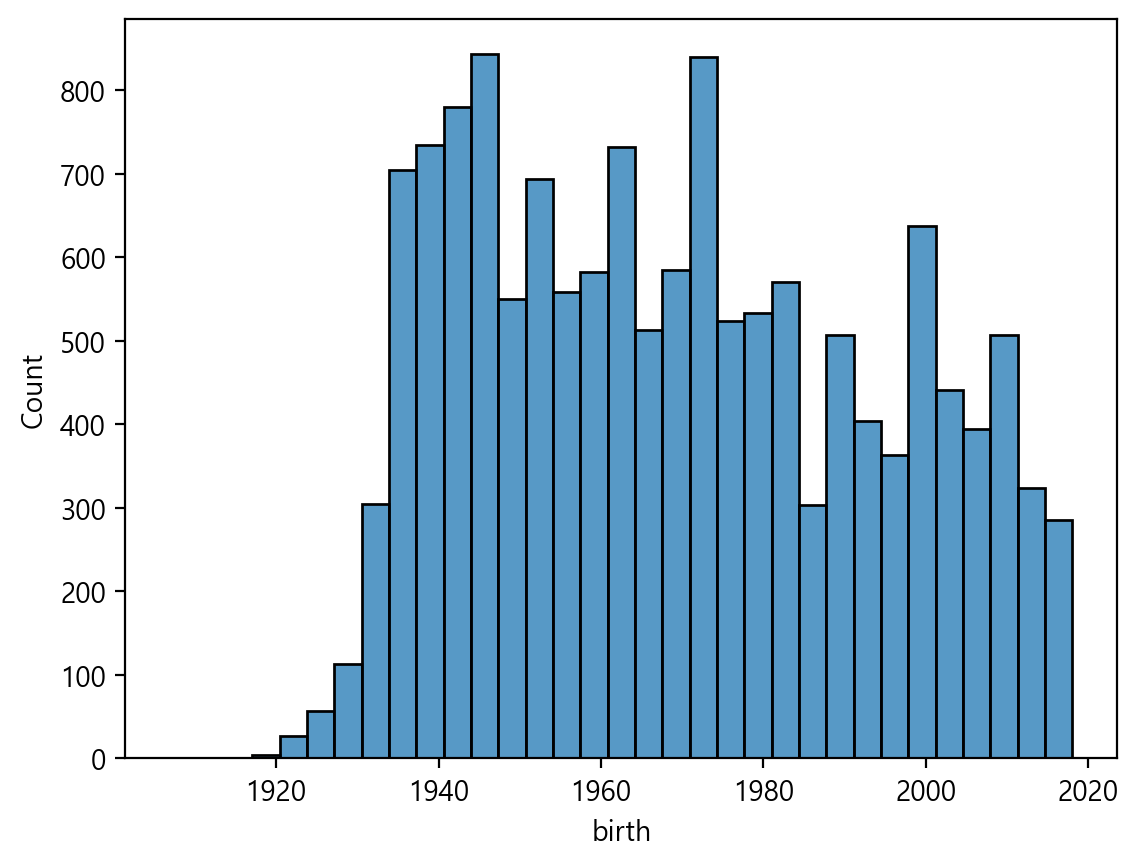

In [24]:
sns.histplot(welfare, x='birth');

In [25]:
welfare['birth'].isna().sum()

0

In [26]:
welfare = welfare.assign(age = 2019 - welfare['birth'])
welfare['age'].describe()

count    14418.00
mean        49.72
std         24.40
min          1.00
25%         29.00
50%         51.00
75%         71.00
max        112.00
Name: age, dtype: float64

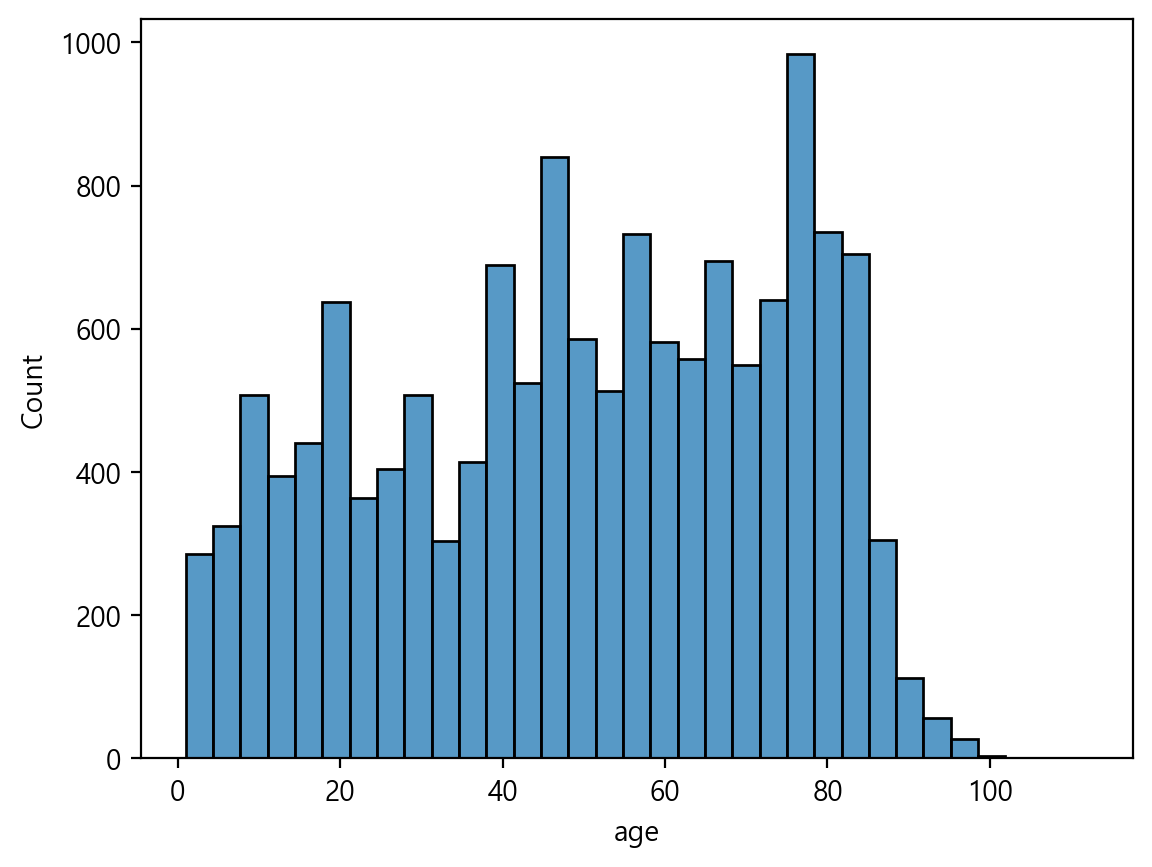

In [27]:
sns.histplot(welfare, x='age');

In [28]:
age_income = welfare.dropna(subset = ['income']) \
                    .groupby('age') \
                    .agg(mean_income = ('income', 'mean'))
age_income.head()

,mean_income
age,
18.0,162.00
19.0,121.33
20.0,136.40
21.0,123.67
22.0,179.68


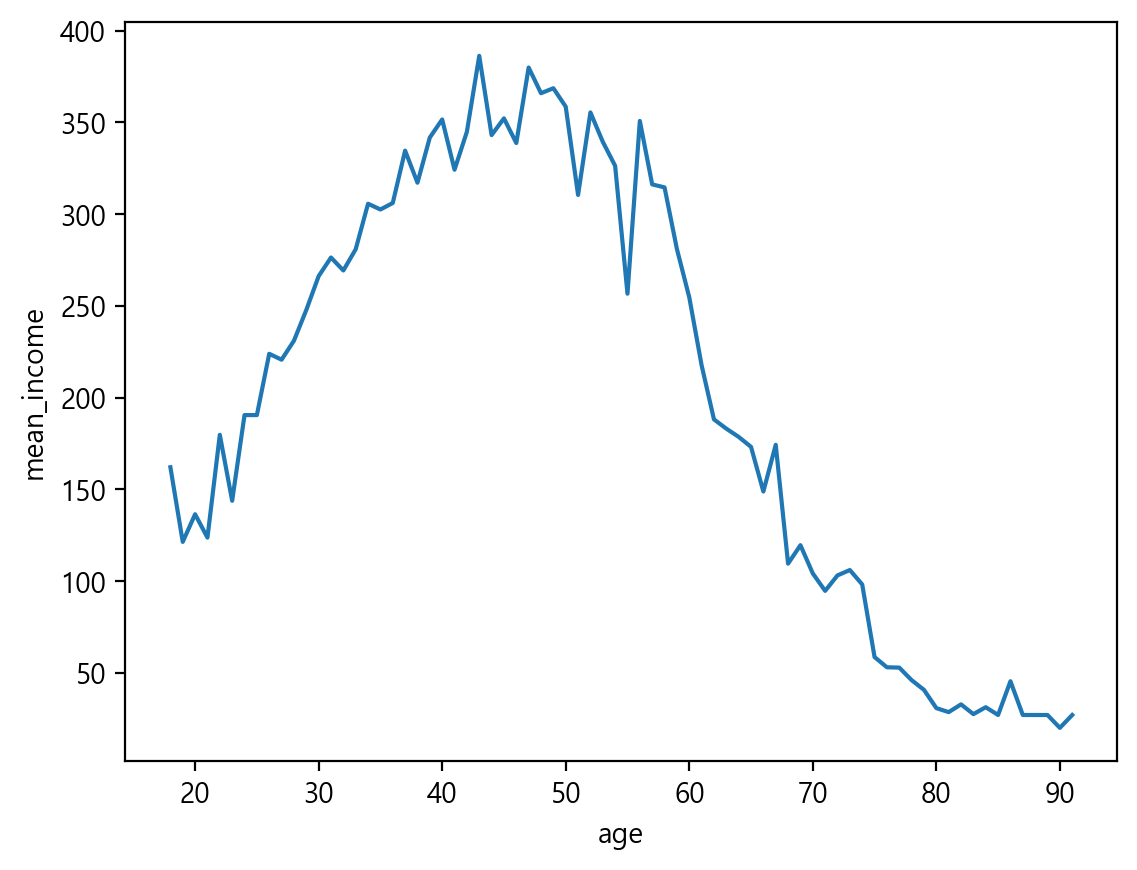

In [29]:
sns.lineplot(age_income, x='age', y = 'mean_income');

In [30]:
welfare = welfare.assign(ageg = np.where(welfare['age'] < 30, 'young', 
                                np.where(welfare['age'] <= 59, 'middle', 'old')))

In [31]:
welfare['ageg'].value_counts()

ageg
old       5743
middle    5066
young     3609
Name: count, dtype: int64

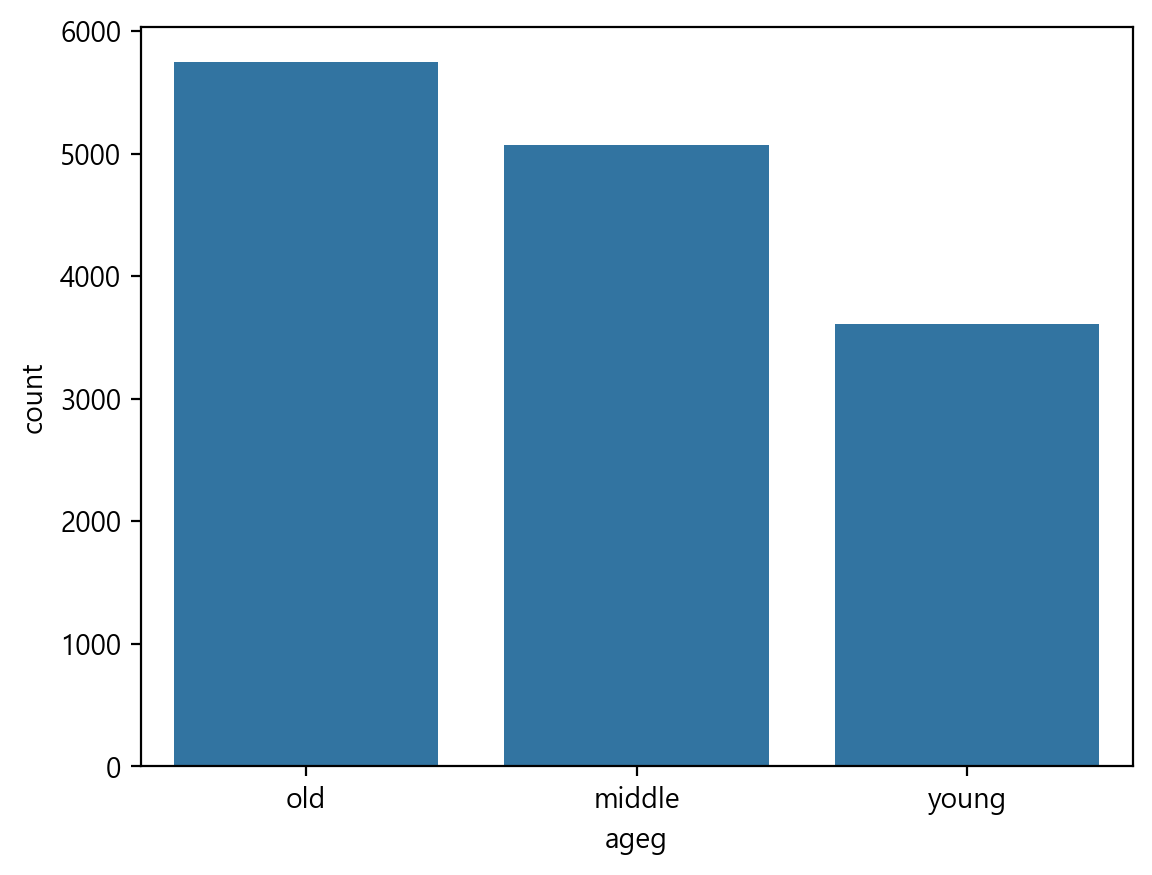

In [32]:

sns.countplot(welfare, x='ageg');

In [33]:
ageg_income = welfare.dropna(subset = ['income']) \
                     .groupby('ageg') \
                     .agg(mean_income = ('income', 'mean'))
ageg_income

,mean_income
ageg,
middle,329.74
old,126.26
young,202.60


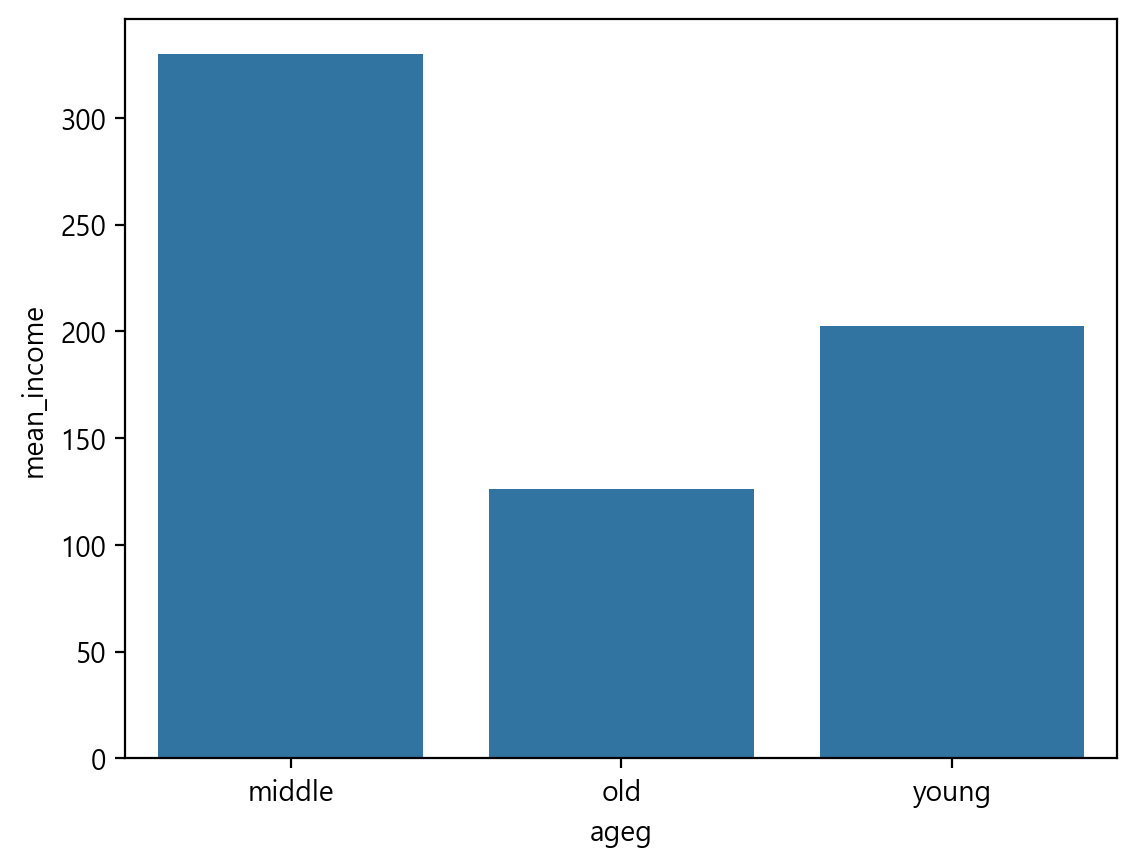

In [34]:
sns.barplot(ageg_income, x='ageg', y='mean_income');

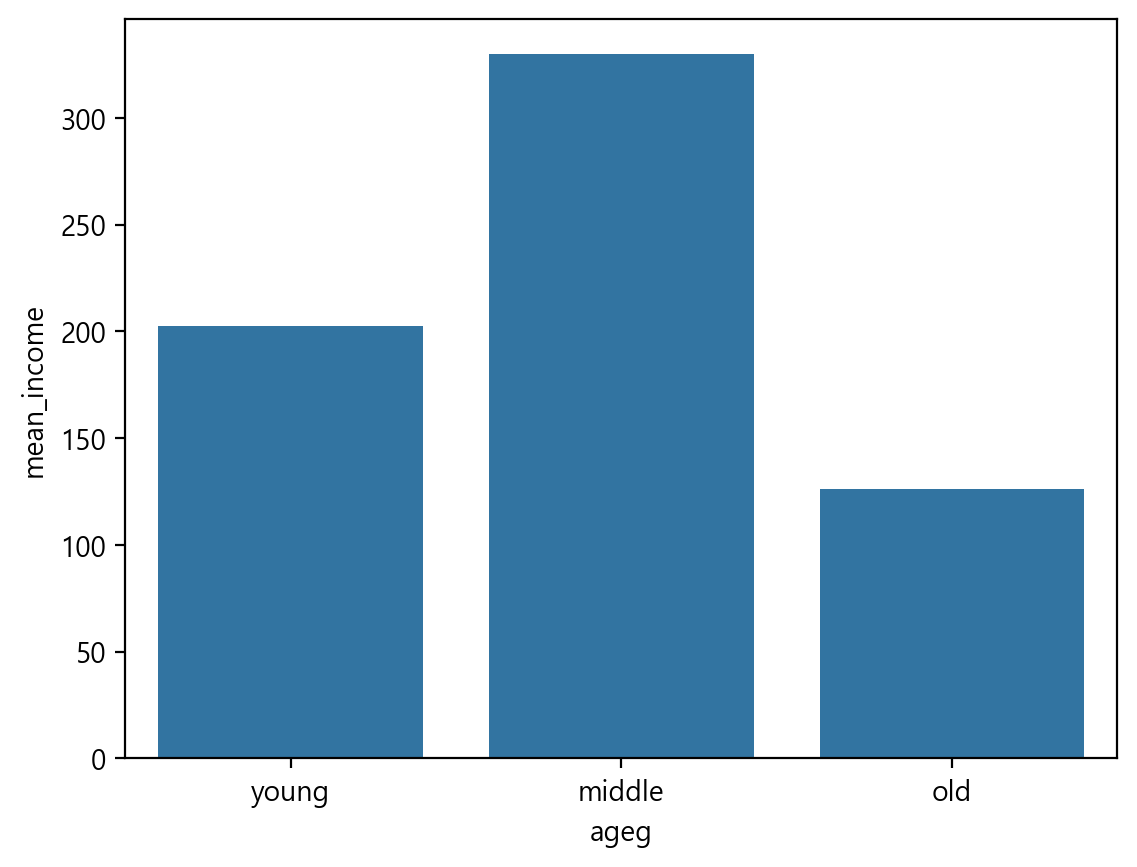

In [35]:
sns.barplot(ageg_income, x='ageg', y='mean_income', order=['young', 'middle', 'old']);

## 10주차 종료, 11주차는 09-5부터 시작

# 11주차 9-5, 5/26(월) 수업 시작

## 연령대 및 성별 월급 차이

In [36]:
sex_income = welfare.dropna(subset = ['income']) \
                    .groupby(['ageg', 'sex'], as_index=False) \
                    .agg(mean_income = ('income', 'mean'))
sex_income

,ageg,sex,mean_income
0,middle,female,229.03
1,middle,male,410.60
2,old,female,84.32
3,old,male,183.91
4,young,female,193.76
5,young,male,215.95


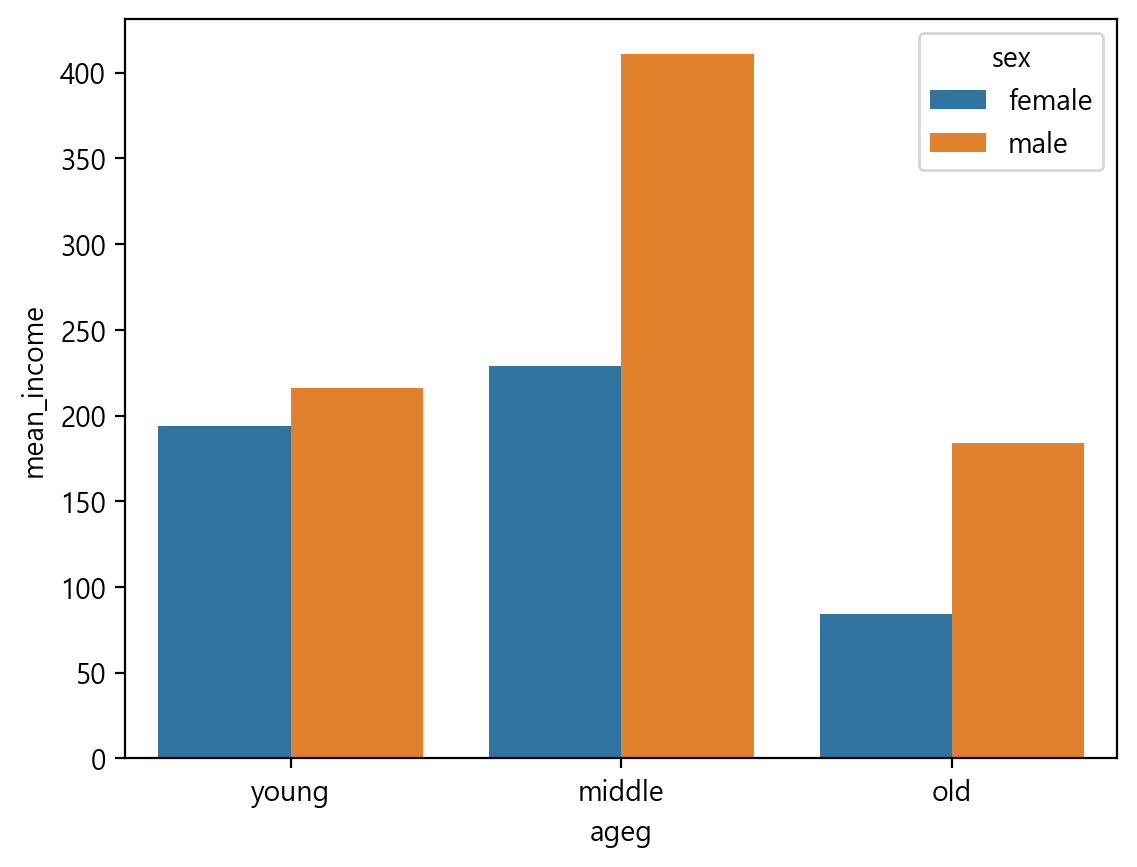

In [37]:
sns.barplot(sex_income, x='ageg', y='mean_income', hue='sex', 
            order=['young', 'middle', 'old']);

In [38]:
sex_age = welfare.dropna(subset = ['income']) \
                 .groupby(['age', 'sex'], as_index=False) \
                 .agg(mean_income = ('income', 'mean'))
sex_age.head()

,age,sex,mean_income
0,18.0,male,162.00
1,19.0,female,87.67
2,19.0,male,155.00
3,20.0,female,124.00
4,20.0,male,186.00


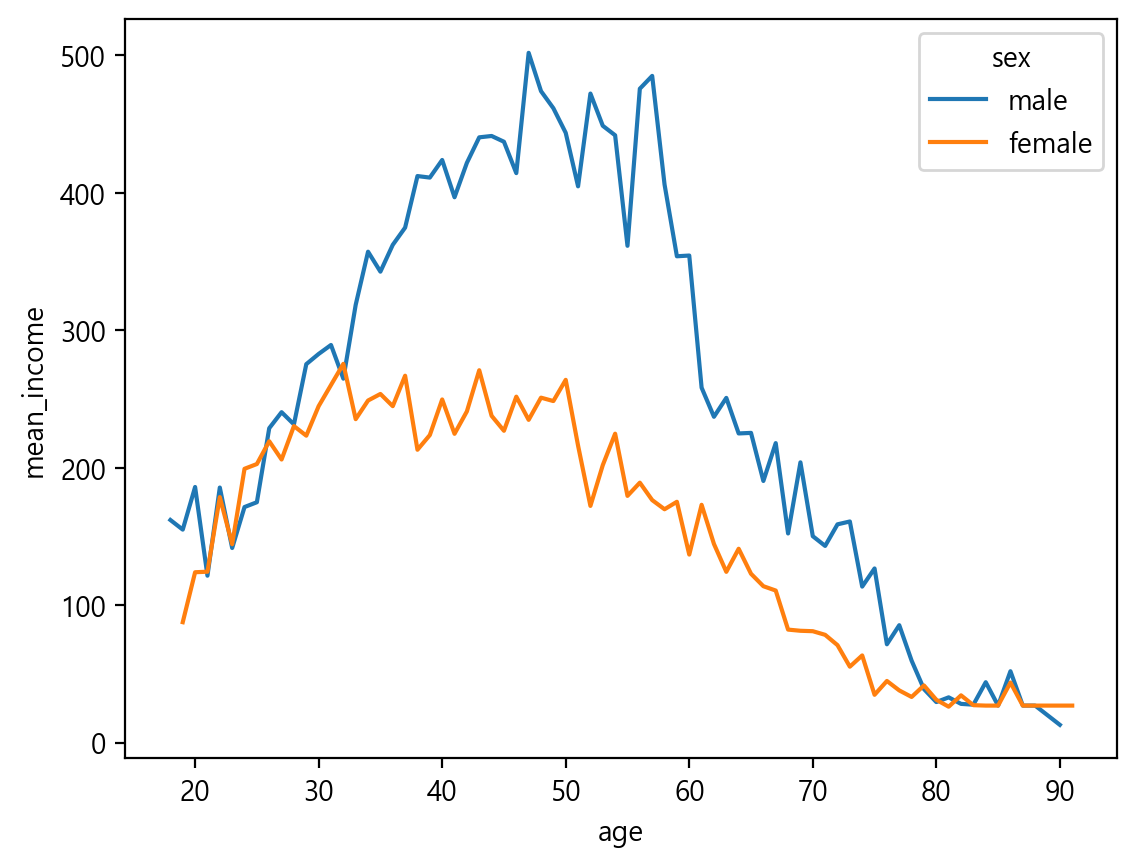

In [39]:
sns.lineplot(sex_age, x='age', y = 'mean_income', hue='sex');

## 직업별 월급 차이

In [40]:
welfare['code_job'].dtypes

dtype('float64')

In [41]:
welfare['code_job'].value_counts()

code_job
611.0    962
941.0    391
521.0    354
312.0    275
873.0    236
        ... 
112.0      2
784.0      2
423.0      1
861.0      1
872.0      1
Name: count, Length: 150, dtype: int64

In [42]:
list_job = pd.read_excel('data/Koweps_Codebook_2019.xlsx', sheet_name = '직종코드')
list_job.head()

,code_job,job
0,111,의회 의원∙고위 공무원 및 공공단체 임원
1,112,기업 고위 임원
2,121,행정 및 경영 지원 관리자
3,122,마케팅 및 광고∙홍보 관리자
4,131,연구∙교육 및 법률 관련 관리자


In [43]:
list_job.shape

(156, 2)

In [44]:
welfare = welfare.merge(list_job, how='left')
welfare[['job']].head()

,job
0,NaN
1,NaN
2,전기공
3,금속기계 부품 조립원
4,NaN


In [45]:
welfare.dropna(subset=['code_job'])[['code_job', 'job']].head()

,code_job,job
2,762.0,전기공
3,855.0,금속기계 부품 조립원
7,941.0,청소원 및 환경미화원
8,999.0,기타 서비스 관련 단순 종사자
14,312.0,경영 관련 사무원


In [46]:
job_income = welfare.dropna(subset= ['job', 'income']) \
                    .groupby('job', as_index=False) \
                    .agg(mean_income = ('income', 'mean'))
job_income.head()

,job,mean_income
0,가사 및 육아 도우미,92.46
1,간호사,265.22
2,감정∙기술영업및중개관련종사자,391.00
3,건물 관리원 및 검표원,168.38
4,건설 및 광업 단순 종사자,261.98


In [47]:
top10 = job_income.sort_values('mean_income', ascending=False).head(10)
top10

,job,mean_income
98,의료 진료 전문가,781.00
60,법률 전문가,776.33
140,행정 및 경영 지원 관리자,771.83
63,보험 및 금융 관리자,734.75
110,재활용 처리 및 소각로 조작원,688.00
131,컴퓨터 하드웨어 및 통신공학 전문가,679.44
24,기계∙로봇공학 기술자 및 시험원,669.17
6,건설∙전기 및 생산 관련 관리자,603.08
120,제관원 및 판금원,597.00
100,의회 의원∙고위 공무원 및 공공단체 임원,580.50


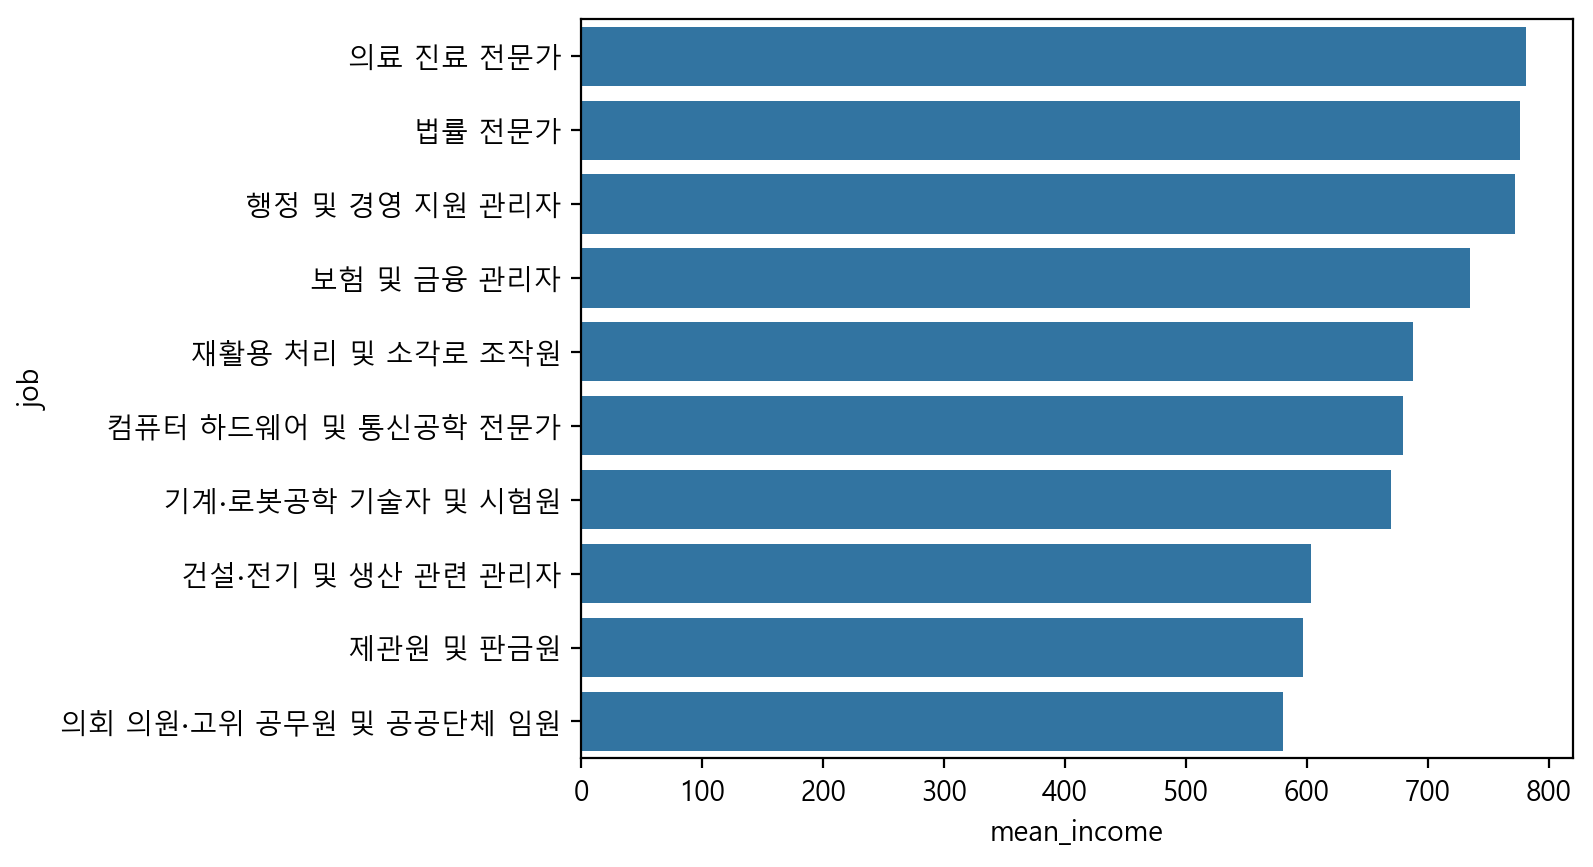

In [48]:
sns.barplot(top10, x='mean_income', y='job');

In [49]:
btm10 = job_income.sort_values('mean_income').head(10)
btm10

,job,mean_income
33,기타 돌봄∙보건 및 개인 생활 서비스 종사자,73.96
34,기타 서비스 관련 단순 종사자,77.79
128,청소원 및 환경미화원,88.46
0,가사 및 육아 도우미,92.46
43,돌봄 및 보건 서비스 종사자,117.16
97,음식 관련 단순 종사자,118.19
39,농림∙어업 관련 단순 종사자,122.62
139,학예사∙사서 및 기록물 관리사,140.00
126,채굴 및 토목 관련 기능 종사자,140.00
135,판매 관련 단순 종사자,140.91


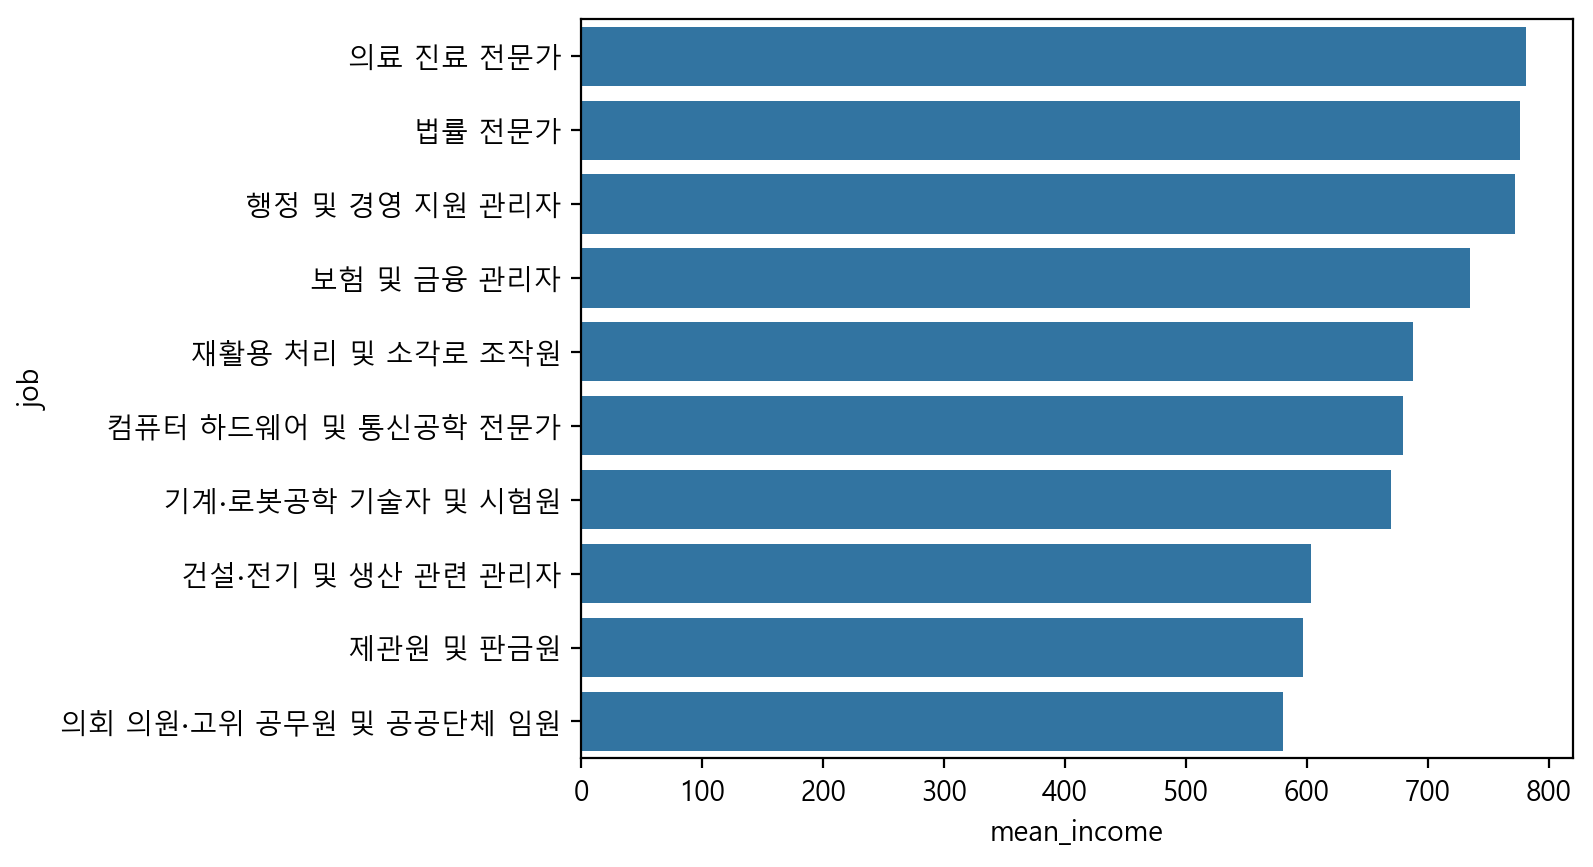

In [50]:
sns.barplot(top10, x='mean_income', y='job');

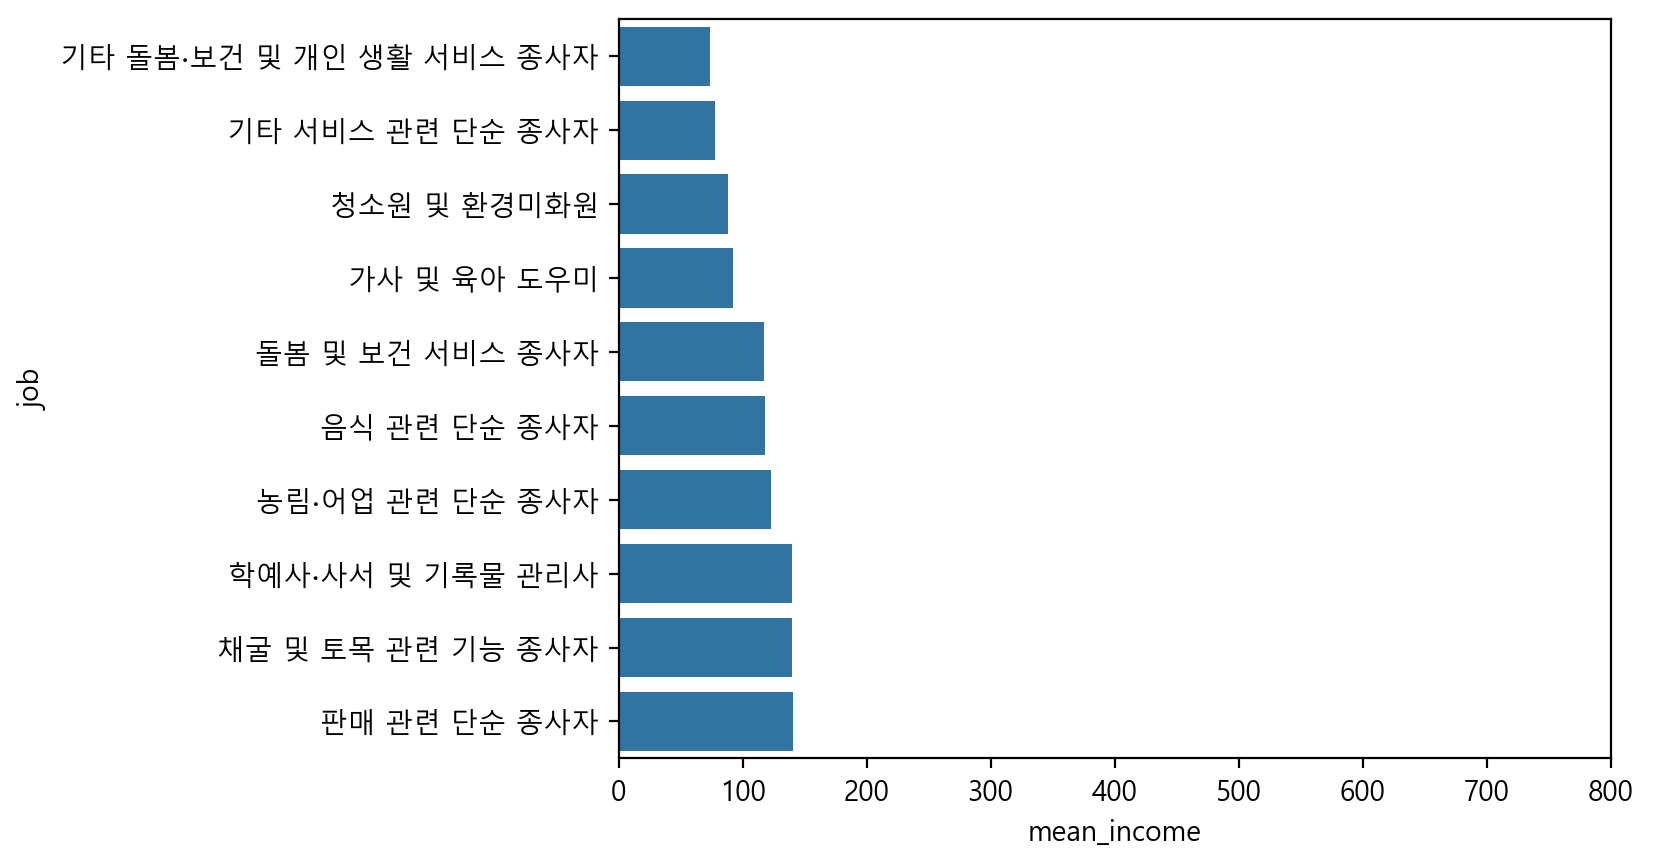

In [51]:
sns.barplot(btm10, x='mean_income', y='job').set(xlim=[0, 800]);

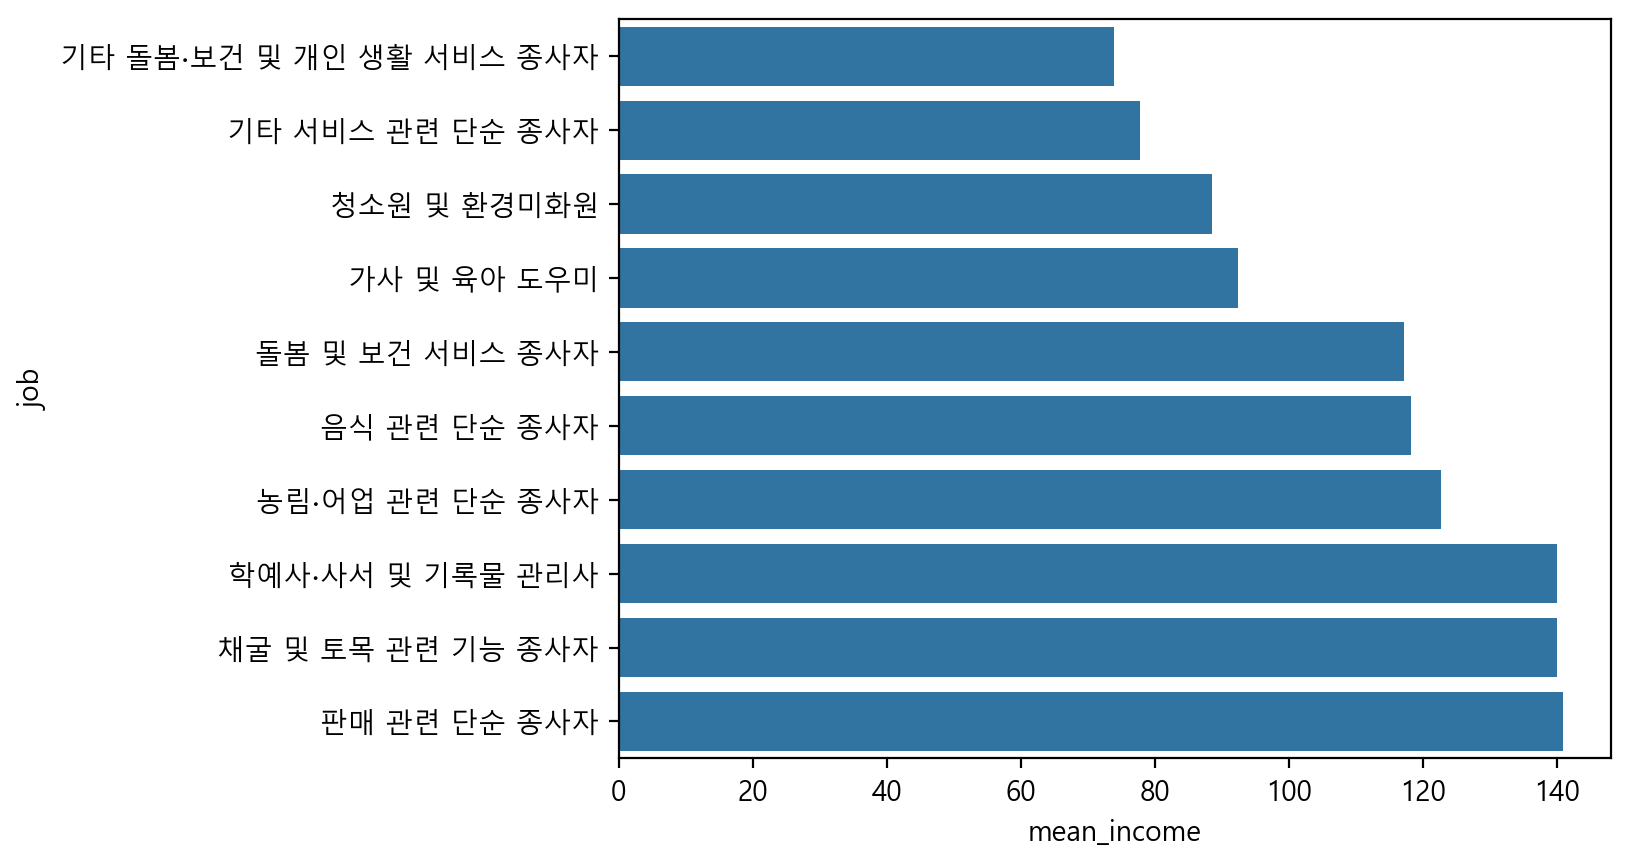

In [52]:
sns.barplot(btm10, x='mean_income', y='job');

## 성별 직업 빈도

In [53]:
job_male = welfare.dropna(subset=['job']) \
                  .query('sex == "male"') \
                  .groupby('job', as_index=False) \
                  .agg( n = ('job', 'count')) \
                  .sort_values('n', ascending=False) \
                  .head(10)
job_male

,job,n
107,작물 재배 종사자,486
104,자동차 운전원,230
11,경영 관련 사무원,216
46,매장 판매 종사자,142
89,영업 종사자,113
127,청소원 및 환경미화원,109
4,건설 및 광업 단순 종사자,96
120,제조 관련 단순 종사자,80
3,건물 관리원 및 검표원,79
141,행정 사무원,74


In [54]:
job_female = welfare.dropna(subset=['job']) \
                    .query('sex == "female"') \
                    .groupby('job', as_index=False) \
                    .agg( n = ('job', 'count')) \
                    .sort_values('n', ascending=False) \
                    .head(10)
job_female

,job,n
83,작물 재배 종사자,476
91,청소원 및 환경미화원,282
33,매장 판매 종사자,212
106,회계 및 경리 사무원,163
31,돌봄 및 보건 서비스 종사자,155
87,제조 관련 단순 종사자,148
73,음식 관련 단순 종사자,126
58,식음료 서비스 종사자,117
88,조리사,114
24,기타 서비스 관련 단순 종사자,97


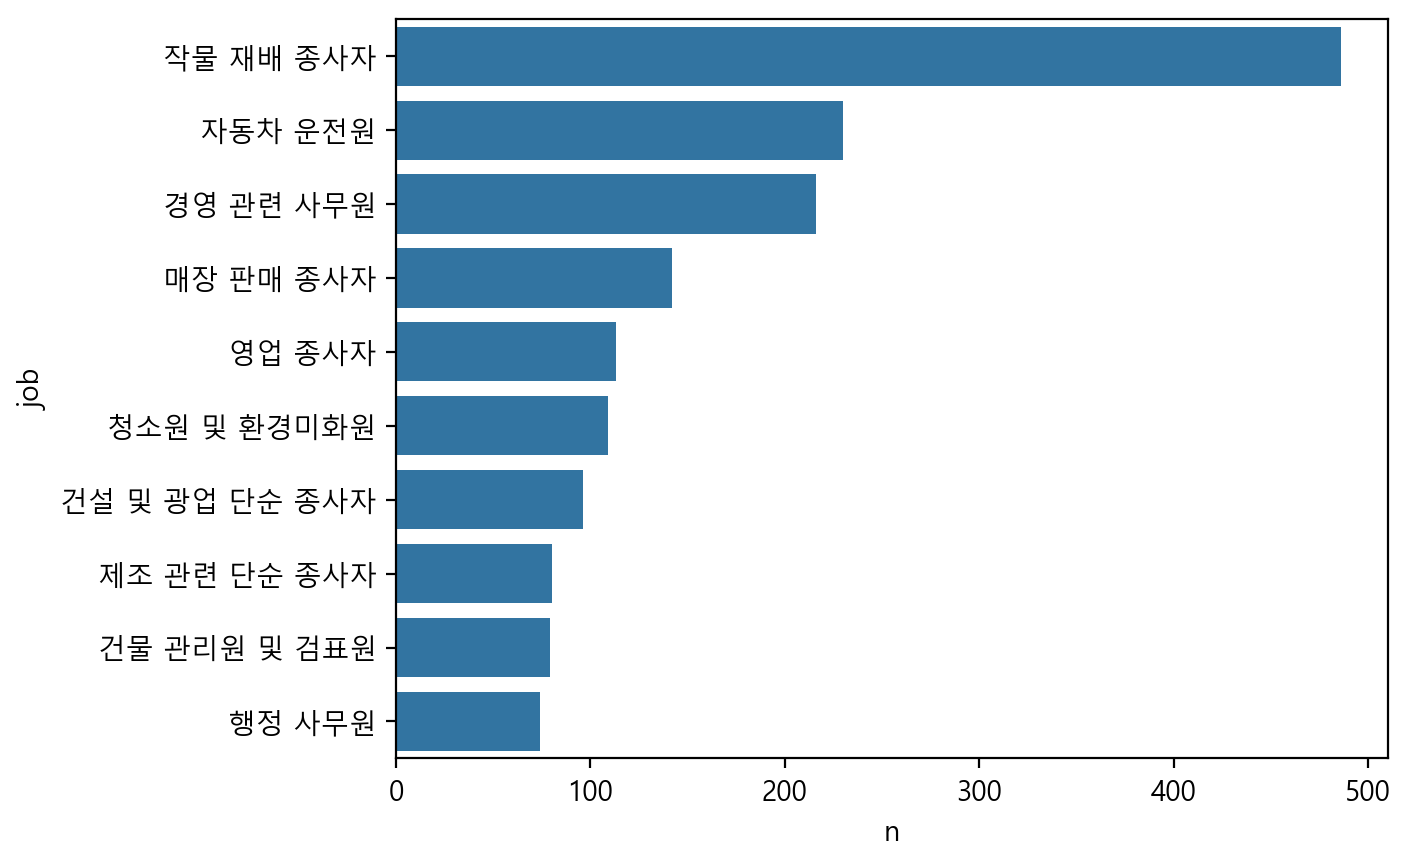

In [55]:
sns.barplot(job_male, x='n', y='job');

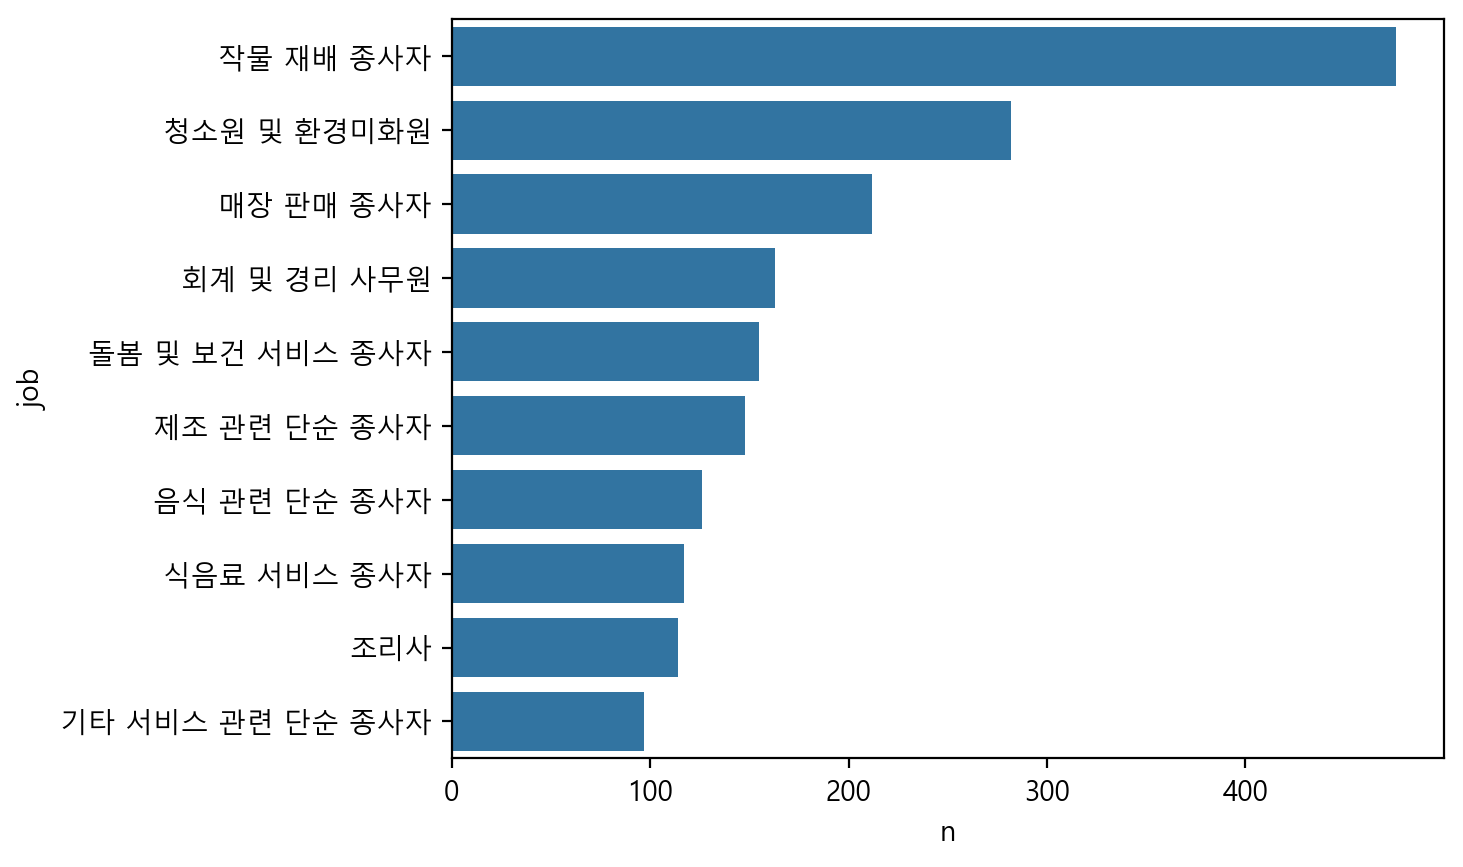

In [56]:
sns.barplot(job_female, x='n', y='job');

## 종교 유무에 따른 이혼율

In [57]:
welfare['religion'].dtypes

dtype('float64')

In [58]:
welfare['religion'].value_counts()

religion
2.0    7815
1.0    6603
Name: count, dtype: int64

In [59]:
welfare['religion'] = np.where(welfare['religion'] == 1, 'yes', 'no')
welfare['religion'].value_counts()

religion
no     7815
yes    6603
Name: count, dtype: int64

<Axes: xlabel='religion', ylabel='count'>

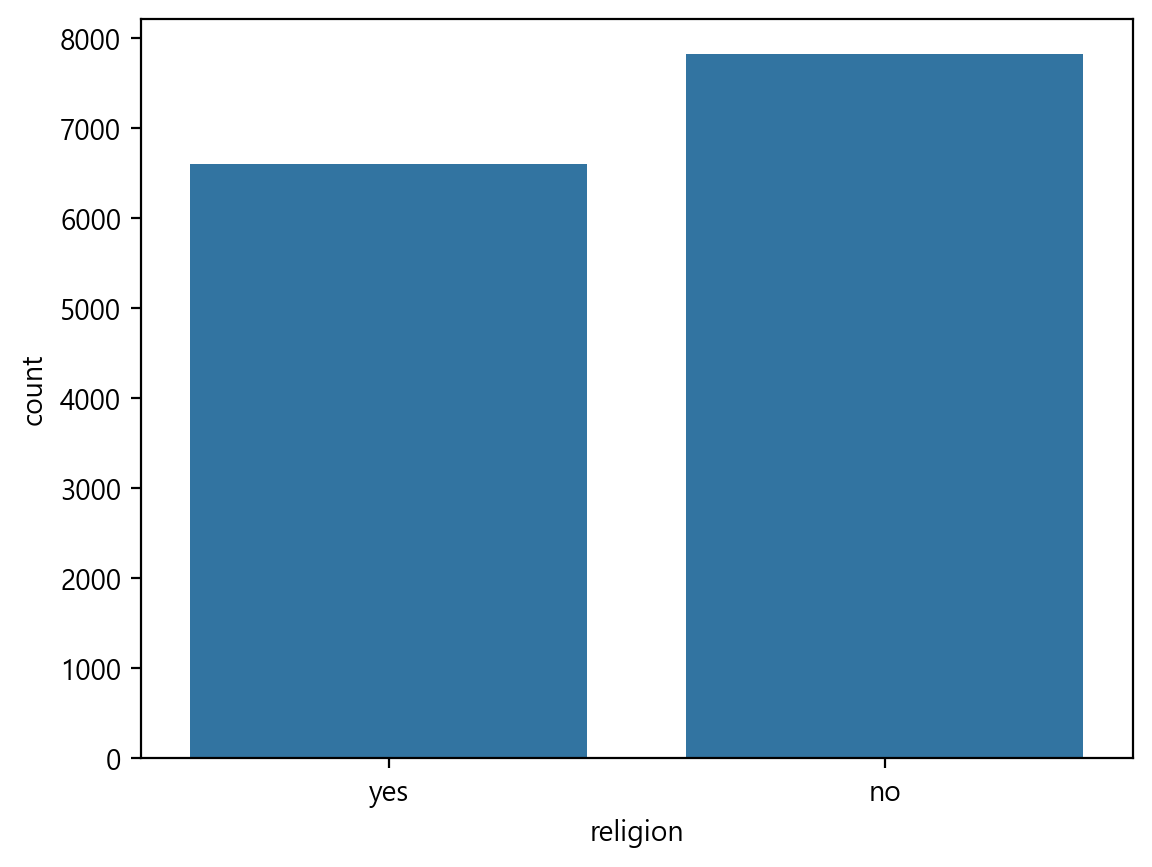

In [60]:
sns.countplot(welfare, x='religion')

In [61]:

welfare['marriage_type'].dtypes

dtype('float64')

In [62]:
welfare['marriage_type'].value_counts()

marriage_type
1.0    7190
5.0    2357
0.0    2121
2.0    1954
3.0     689
4.0      78
6.0      29
Name: count, dtype: int64

In [63]:
welfare['marriage'] = np.where(welfare['marriage_type'] == 1, 'marriage', 
                      np.where(welfare['marriage_type'] == 3, 'divorce', 'etc'))
welfare['marriage'].head()

0         etc
1         etc
2     divorce
3    marriage
4    marriage
Name: marriage, dtype: object

In [64]:
n_divorce = welfare.groupby('marriage', as_index=False) \
                   .agg( n = ('marriage', 'count'))
n_divorce

,marriage,n
0,divorce,689
1,etc,6539
2,marriage,7190


<Axes: xlabel='marriage', ylabel='n'>

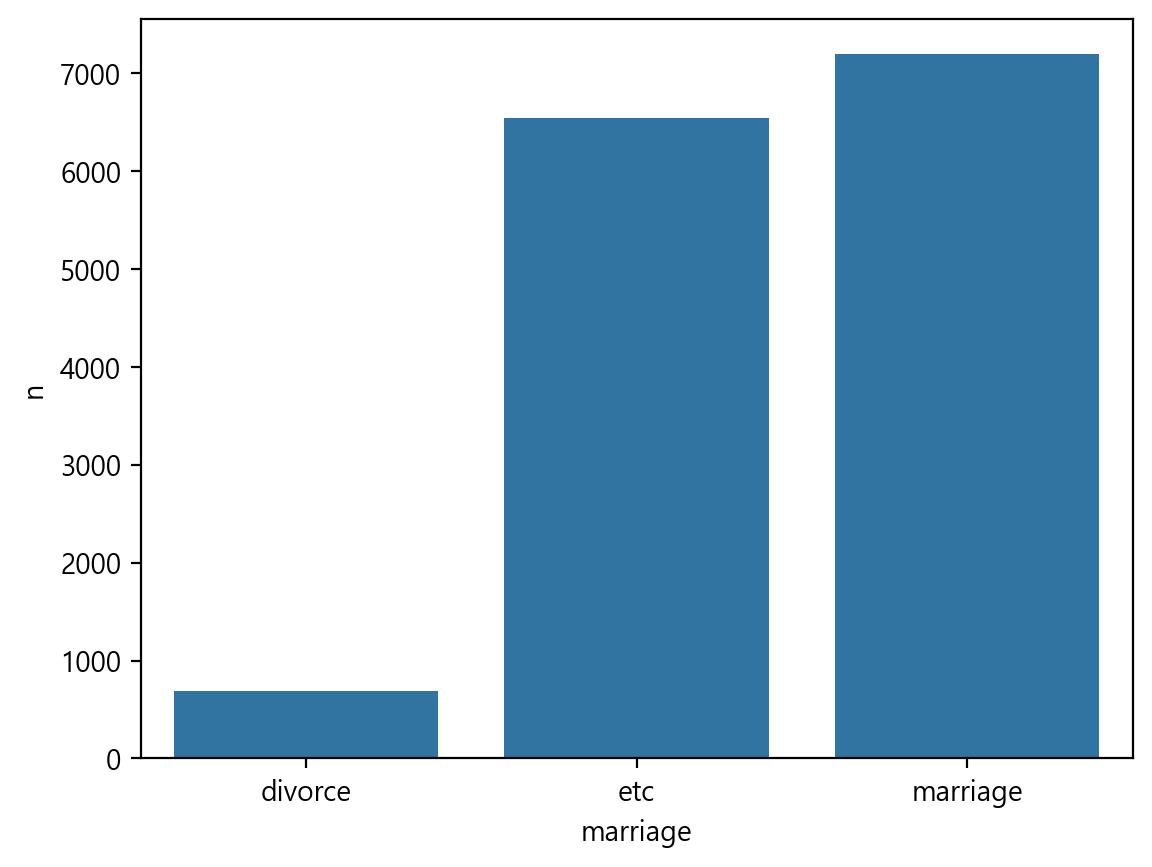

In [65]:
sns.barplot(n_divorce, x='marriage', y='n')

In [66]:
rel_div = welfare.query('marriage != "etc"') \
                 .groupby('religion', as_index=False) \
                 ['marriage'] \
                 .value_counts()
rel_div

,religion,marriage,count
0,no,marriage,3660
1,no,divorce,384
2,yes,marriage,3530
3,yes,divorce,305


In [67]:
rel_div = welfare.query('marriage != "etc"') \
                 .groupby('religion', as_index=False) \
                 ['marriage'] \
                 .value_counts(normalize=True)
rel_div

,religion,marriage,proportion
0,no,marriage,0.91
1,no,divorce,0.09
2,yes,marriage,0.92
3,yes,divorce,0.08


In [68]:

rel_div = rel_div.query('marriage == "divorce"') \
                 .assign(proportion = rel_div['proportion'] * 100)
rel_div

,religion,marriage,proportion
1,no,divorce,9.50
3,yes,divorce,7.95


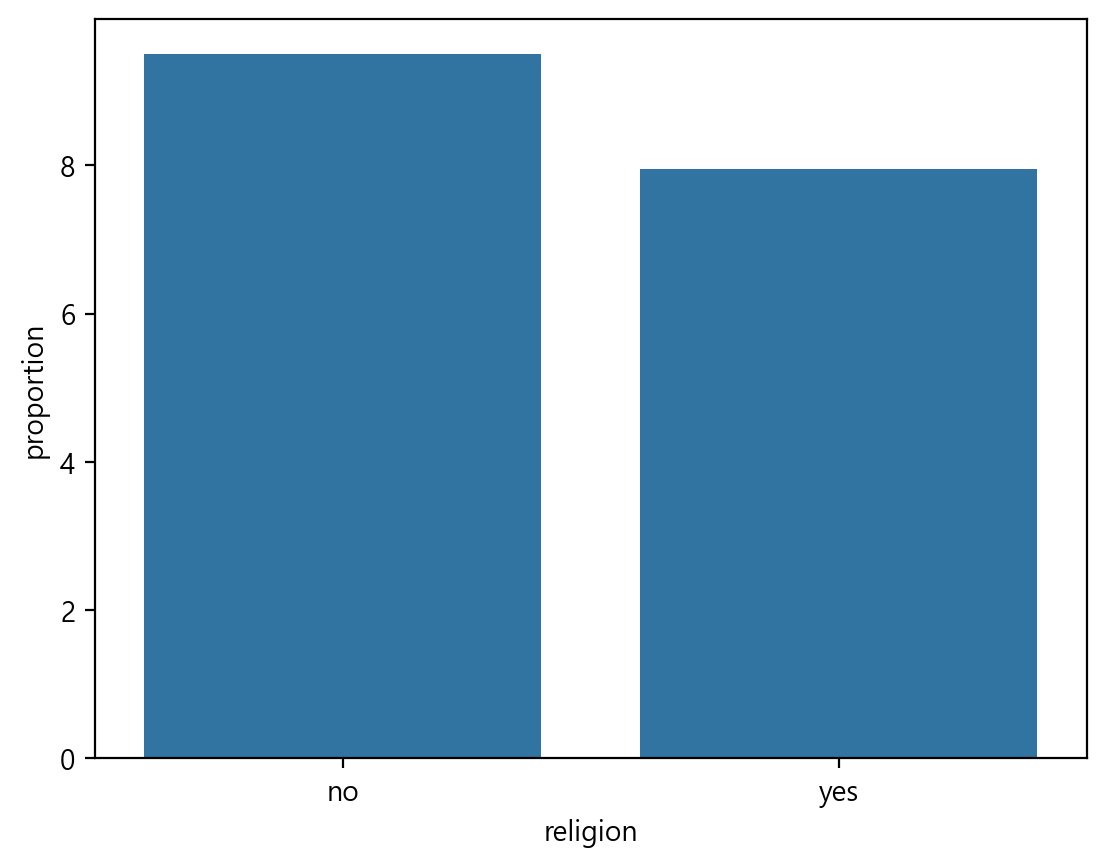

In [69]:
sns.barplot(rel_div, x='religion', y='proportion');

In [70]:
age_div = welfare.query('marriage != "etc"') \
                 .groupby('ageg', as_index=False) \
                 ['marriage'] \
                 .value_counts(normalize=True)
age_div

,ageg,marriage,proportion
0,middle,marriage,0.91
1,middle,divorce,0.09
2,old,marriage,0.92
3,old,divorce,0.08
4,young,marriage,0.96
5,young,divorce,0.04


In [71]:
welfare.query('marriage != "etc"') \
                 .groupby('ageg', as_index=False) \
                 ['marriage'] \
                 .value_counts()

,ageg,marriage,count
0,middle,marriage,3689
1,middle,divorce,376
2,old,marriage,3423
3,old,divorce,310
4,young,marriage,78
5,young,divorce,3


In [72]:
age_div = age_div.query('ageg != "young" & marriage == "divorce"') \
                 .assign(proportion = age_div['proportion'] * 100) 
age_div

,ageg,marriage,proportion
1,middle,divorce,9.25
3,old,divorce,8.30


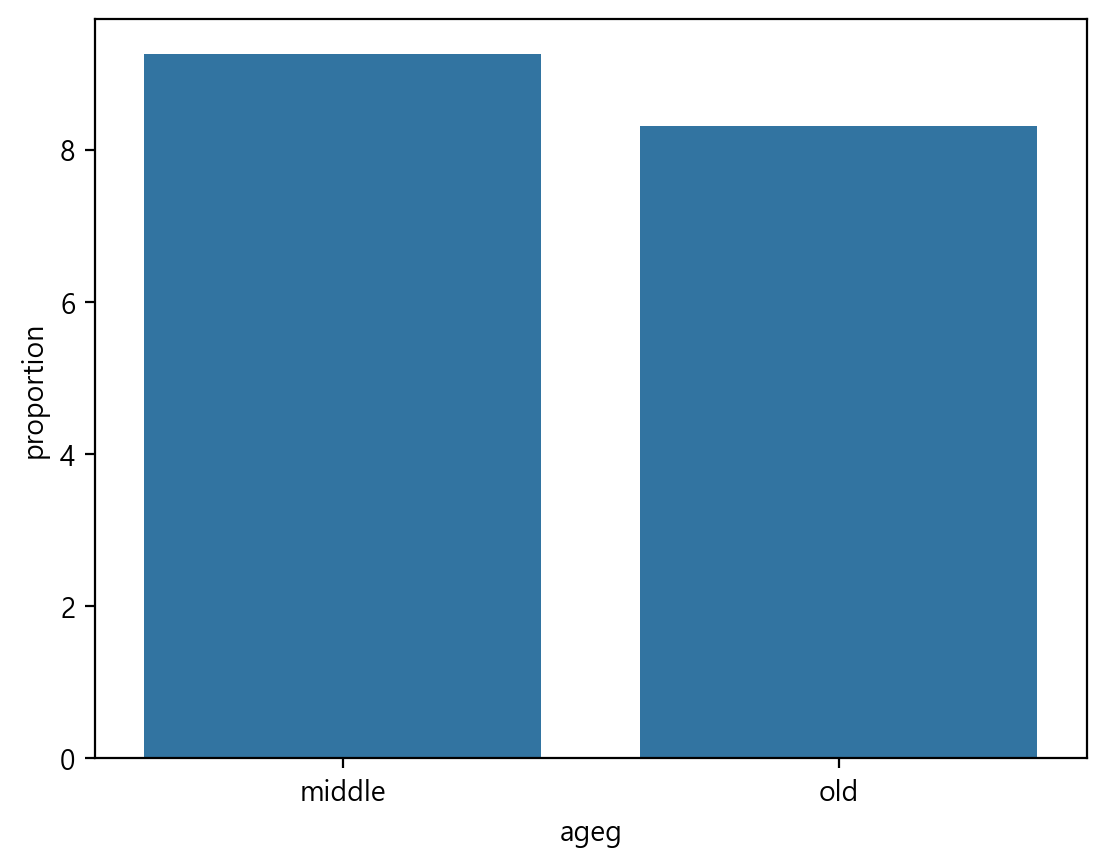

In [73]:
sns.barplot(age_div, x='ageg', y='proportion');

In [74]:
# etc 제외, 초년층 제외
# ageg, religion별 분리
# marriage 추출
# 비율 구하기
age_rel_div = welfare.query('marriage != "etc" & ageg != "young"') \
                     .groupby(['ageg', 'religion'], as_index = False) \
                     ['marriage'] \
                     .value_counts(normalize = True)
           
age_rel_div

,ageg,religion,marriage,proportion
0,middle,no,marriage,0.90
1,middle,no,divorce,0.10
2,middle,yes,marriage,0.92
3,middle,yes,divorce,0.08
4,old,no,marriage,0.91
5,old,no,divorce,0.09
6,old,yes,marriage,0.92
7,old,yes,divorce,0.08


In [75]:
age_rel_div = age_rel_div.query('marriage == "divorce"') \
                         .assign(proportion = age_rel_div['proportion'] * 100) 
age_rel_div

,ageg,religion,marriage,proportion
1,middle,no,divorce,9.91
3,middle,yes,divorce,8.38
5,old,no,divorce,9.05
7,old,yes,divorce,7.70


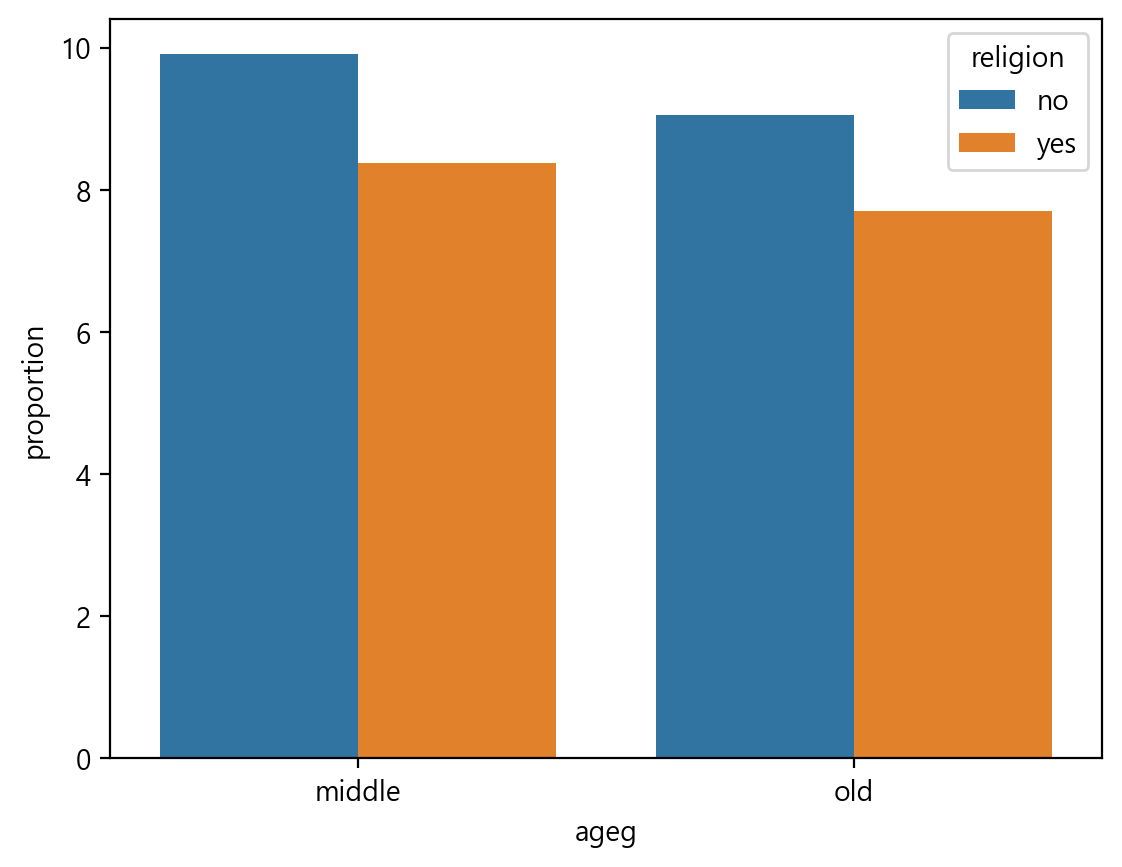

In [76]:
sns.barplot(age_rel_div, x='ageg', y='proportion', hue='religion');

## 지역별 연령대 비율

In [78]:
welfare['code_region'].dtypes

dtype('float64')

In [79]:

welfare['code_region'].value_counts()


code_region
2.0    3246
7.0    2466
3.0    2448
1.0    2002
4.0    1728
5.0    1391
6.0    1137
Name: count, dtype: int64

In [80]:
# 지역 코드 목록 만들기
list_region = pd.DataFrame({'code_region' : [1, 2, 3, 4, 5, 6, 7],
                            'region'      : ['서울',
                                             '수도권(인천/경기)',
                                             '부산/경남/울산',
                                             '대구/경북',
                                             '대전/충남',
                                             '강원/충북',
                                             '광주/전남/전북/제주도']})
list_region

,code_region,region
0,1,서울
1,2,수도권(인천/경기)
2,3,부산/경남/울산
3,4,대구/경북
4,5,대전/충남
5,6,강원/충북
6,7,광주/전남/전북/제주도


In [81]:
welfare = welfare.merge(list_region, how='left')
welfare[['code_region', 'region']].head()

,code_region,region
0,1.0,서울
1,1.0,서울
2,1.0,서울
3,1.0,서울
4,1.0,서울


In [82]:

welfare[['code_region', 'region']].sample(10)

,code_region,region
2719,3.0,부산/경남/울산
12012,2.0,수도권(인천/경기)
14296,6.0,강원/충북
8137,5.0,대전/충남
13050,1.0,서울
10609,3.0,부산/경남/울산
13695,4.0,대구/경북
994,1.0,서울
13166,6.0,강원/충북
14311,5.0,대전/충남


In [83]:
region_ageg = welfare.groupby('region', as_index = False) \
                     ['ageg'] \
                     .value_counts(normalize = True)
region_ageg

,region,ageg,proportion
0,강원/충북,old,0.44
1,강원/충북,middle,0.32
2,강원/충북,young,0.24
3,광주/전남/전북/제주도,old,0.44
4,광주/전남/전북/제주도,middle,0.32
5,광주/전남/전북/제주도,young,0.24
6,대구/경북,old,0.49
7,대구/경북,middle,0.30
8,대구/경북,young,0.21
9,대전/충남,old,0.40


In [84]:
region_ageg = region_ageg.assign(proportion = region_ageg['proportion'] * 100)
region_ageg


,region,ageg,proportion
0,강원/충북,old,44.15
1,강원/충북,middle,31.84
2,강원/충북,young,24.01
3,광주/전남/전북/제주도,old,43.55
4,광주/전남/전북/제주도,middle,32.48
5,광주/전남/전북/제주도,young,23.97
6,대구/경북,old,48.90
7,대구/경북,middle,30.44
8,대구/경북,young,20.66
9,대전/충남,old,40.12


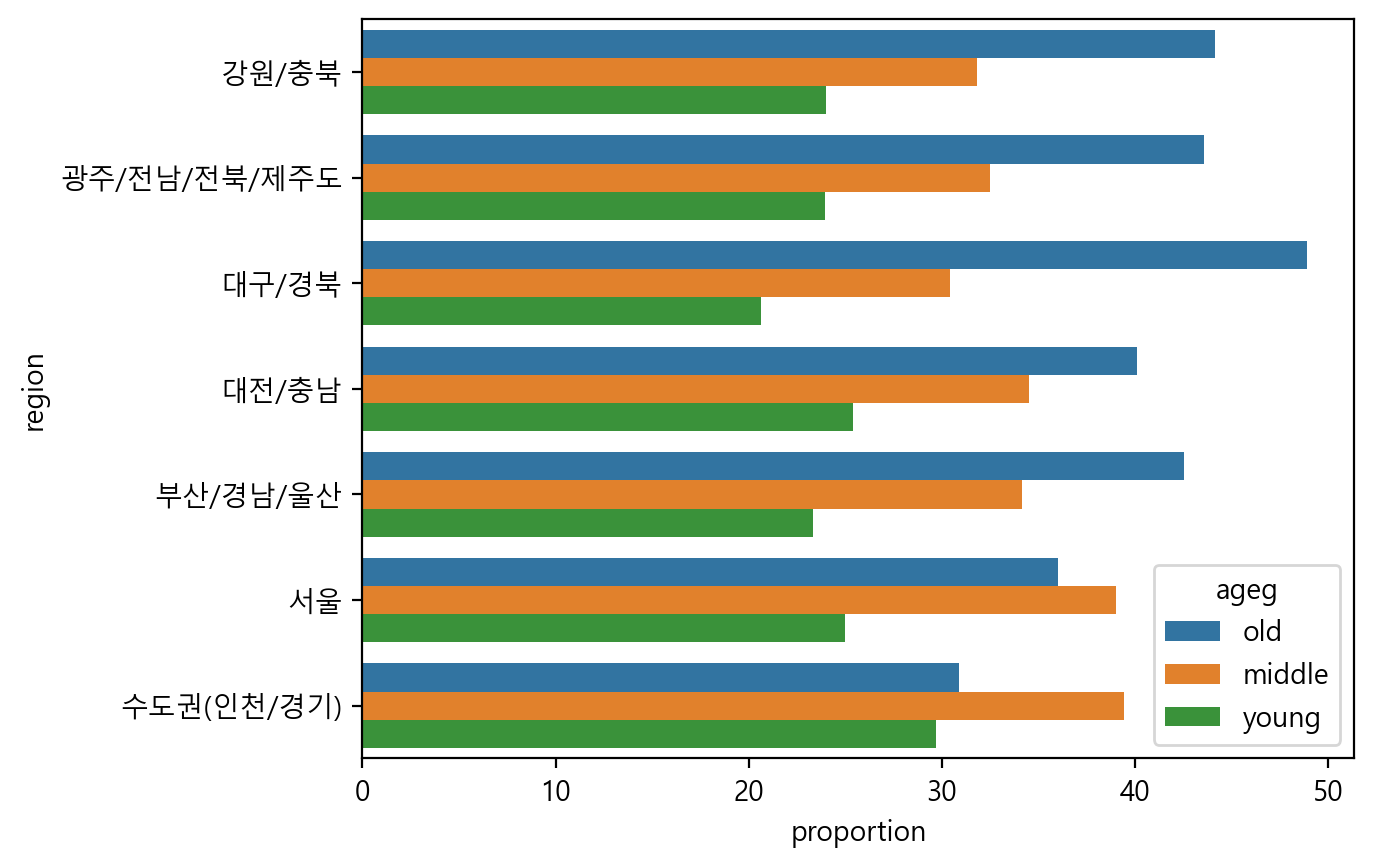

In [85]:

sns.barplot(region_ageg, y = 'region', x = 'proportion', hue = 'ageg');

In [86]:
region_ageg[['region', 'ageg', 'proportion']].head()

,region,ageg,proportion
0,강원/충북,old,44.15
1,강원/충북,middle,31.84
2,강원/충북,young,24.01
3,광주/전남/전북/제주도,old,43.55
4,광주/전남/전북/제주도,middle,32.48


### 피봇테이블: 기말시험 가능

In [87]:
region_ageg[['region', 'ageg', 'proportion']]

,region,ageg,proportion
0,강원/충북,old,44.15
1,강원/충북,middle,31.84
2,강원/충북,young,24.01
3,광주/전남/전북/제주도,old,43.55
4,광주/전남/전북/제주도,middle,32.48
5,광주/전남/전북/제주도,young,23.97
6,대구/경북,old,48.90
7,대구/경북,middle,30.44
8,대구/경북,young,20.66
9,대전/충남,old,40.12


In [88]:
piv_df = region_ageg[['region', 'ageg', 'proportion']].pivot(index= 'region', 
                                                             columns='ageg', 
                                                             values = 'proportion')
piv_df

ageg,middle,old,young
region,,,
강원/충북,31.84,44.15,24.01
광주/전남/전북/제주도,32.48,43.55,23.97
대구/경북,30.44,48.90,20.66
대전/충남,34.51,40.12,25.38
부산/경남/울산,34.15,42.52,23.33
서울,39.01,36.01,24.98
수도권(인천/경기),39.43,30.87,29.70


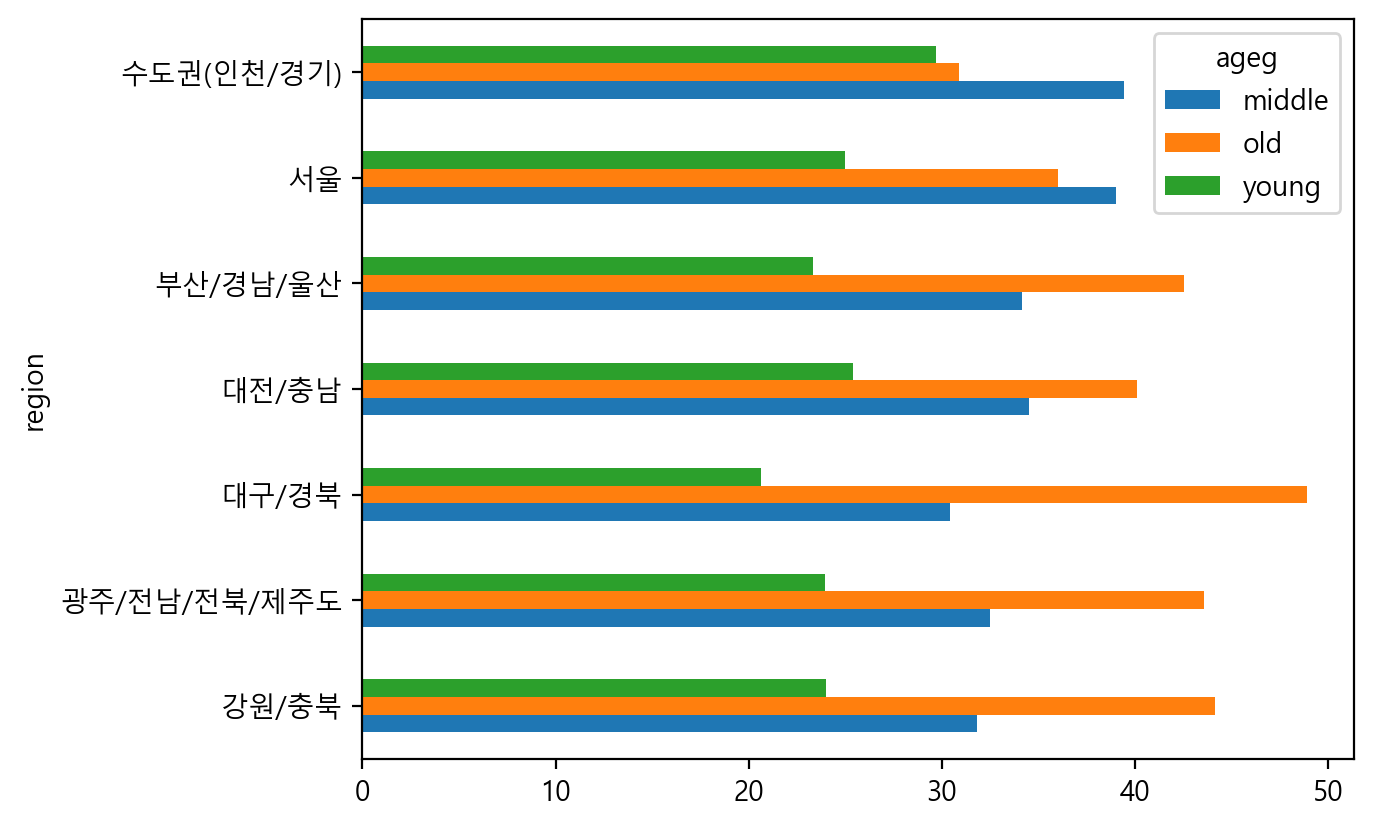

In [89]:
piv_df.plot.barh();

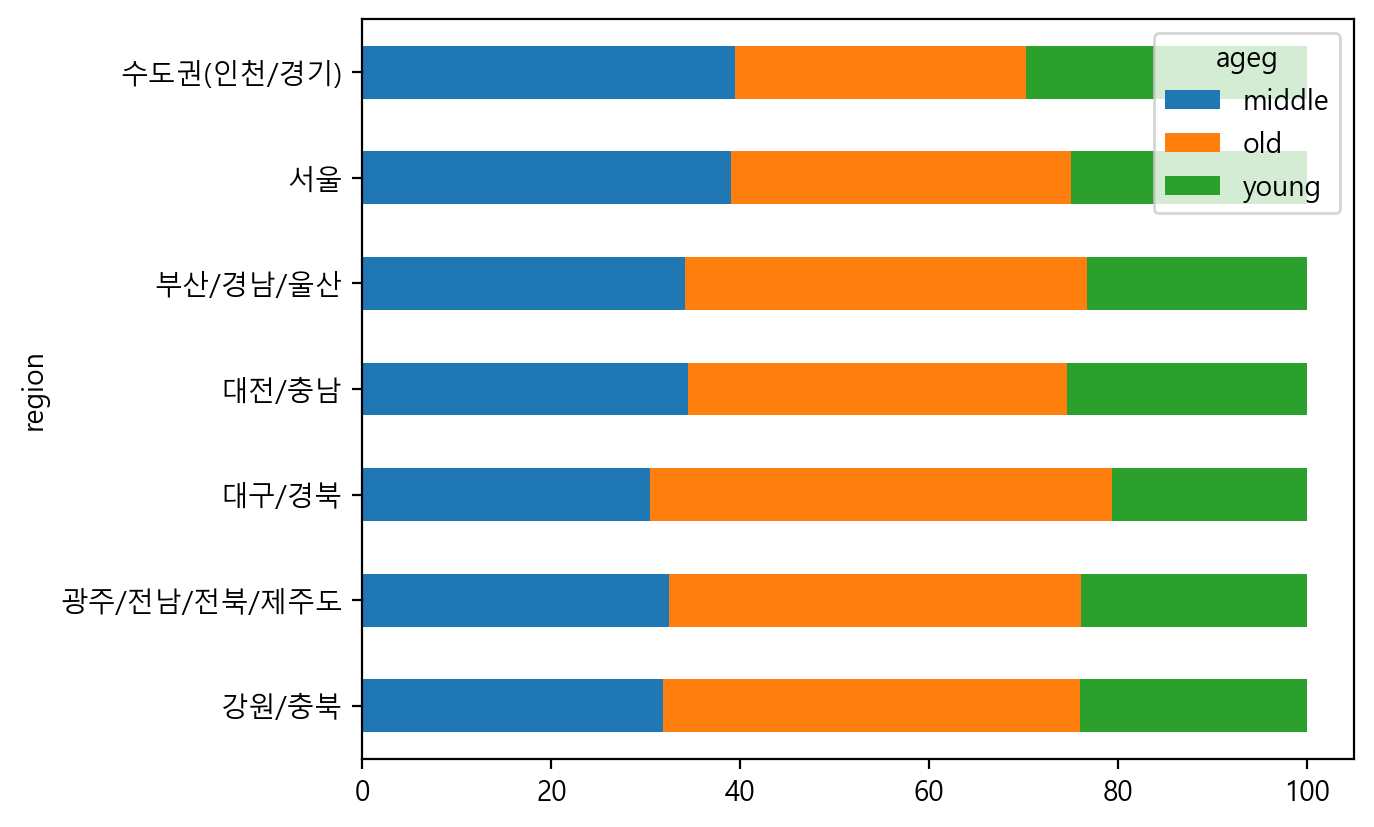

In [90]:
piv_df.plot.barh(stacked = True);

In [91]:
piv_df

ageg,middle,old,young
region,,,
강원/충북,31.84,44.15,24.01
광주/전남/전북/제주도,32.48,43.55,23.97
대구/경북,30.44,48.90,20.66
대전/충남,34.51,40.12,25.38
부산/경남/울산,34.15,42.52,23.33
서울,39.01,36.01,24.98
수도권(인천/경기),39.43,30.87,29.70


In [92]:
piv_df.sort_values('old')

ageg,middle,old,young
region,,,
수도권(인천/경기),39.43,30.87,29.70
서울,39.01,36.01,24.98
대전/충남,34.51,40.12,25.38
부산/경남/울산,34.15,42.52,23.33
광주/전남/전북/제주도,32.48,43.55,23.97
강원/충북,31.84,44.15,24.01
대구/경북,30.44,48.90,20.66


In [93]:
piv_df.sort_values('old')[['young', 'middle', 'old']]

ageg,young,middle,old
region,,,
수도권(인천/경기),29.70,39.43,30.87
서울,24.98,39.01,36.01
대전/충남,25.38,34.51,40.12
부산/경남/울산,23.33,34.15,42.52
광주/전남/전북/제주도,23.97,32.48,43.55
강원/충북,24.01,31.84,44.15
대구/경북,20.66,30.44,48.90


In [94]:
reorder_df = piv_df.sort_values('old')[['young', 'middle', 'old']]
reorder_df 

ageg,young,middle,old
region,,,
수도권(인천/경기),29.70,39.43,30.87
서울,24.98,39.01,36.01
대전/충남,25.38,34.51,40.12
부산/경남/울산,23.33,34.15,42.52
광주/전남/전북/제주도,23.97,32.48,43.55
강원/충북,24.01,31.84,44.15
대구/경북,20.66,30.44,48.90


<Axes: ylabel='region'>

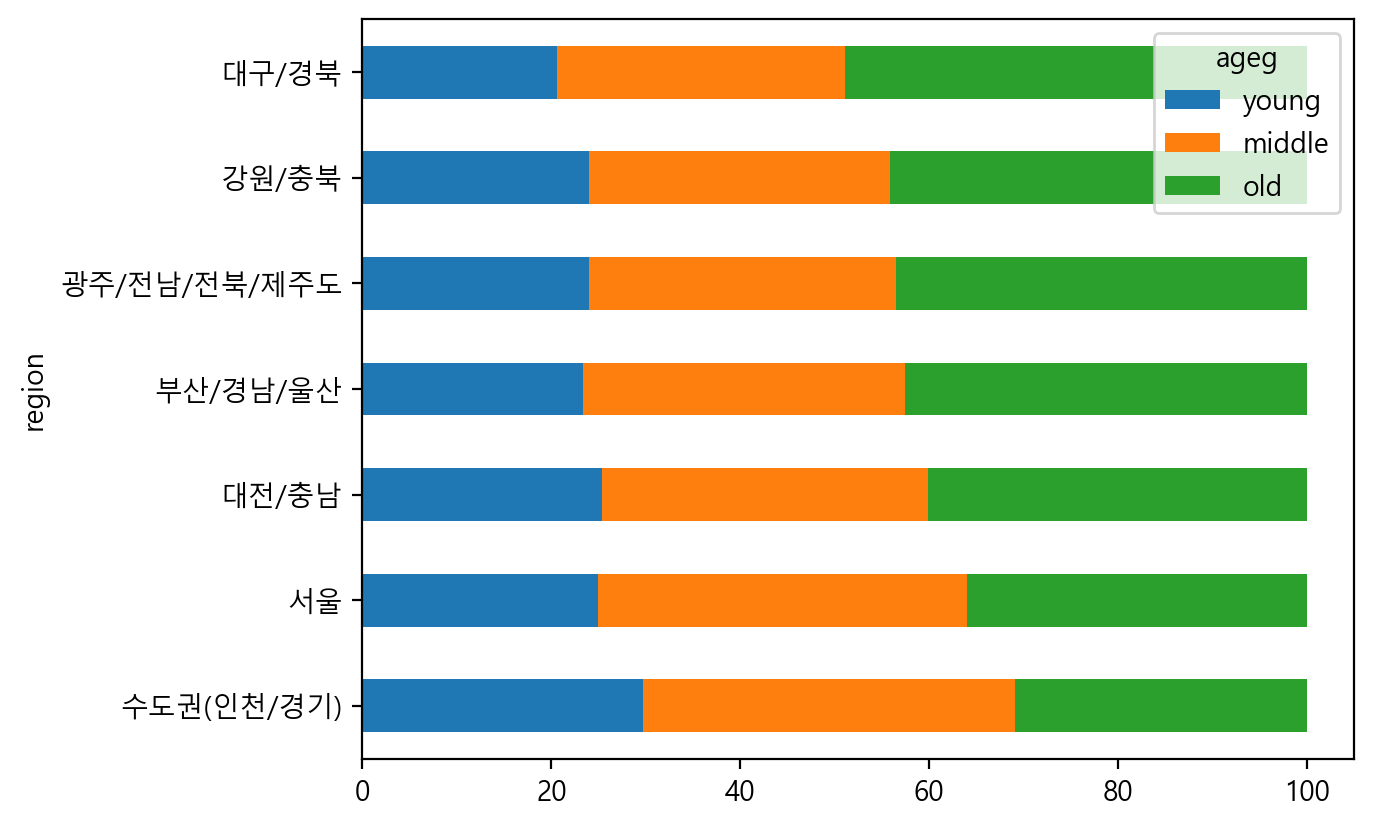

In [95]:
reorder_df.plot.barh(stacked = True)

<Axes: ylabel='region'>

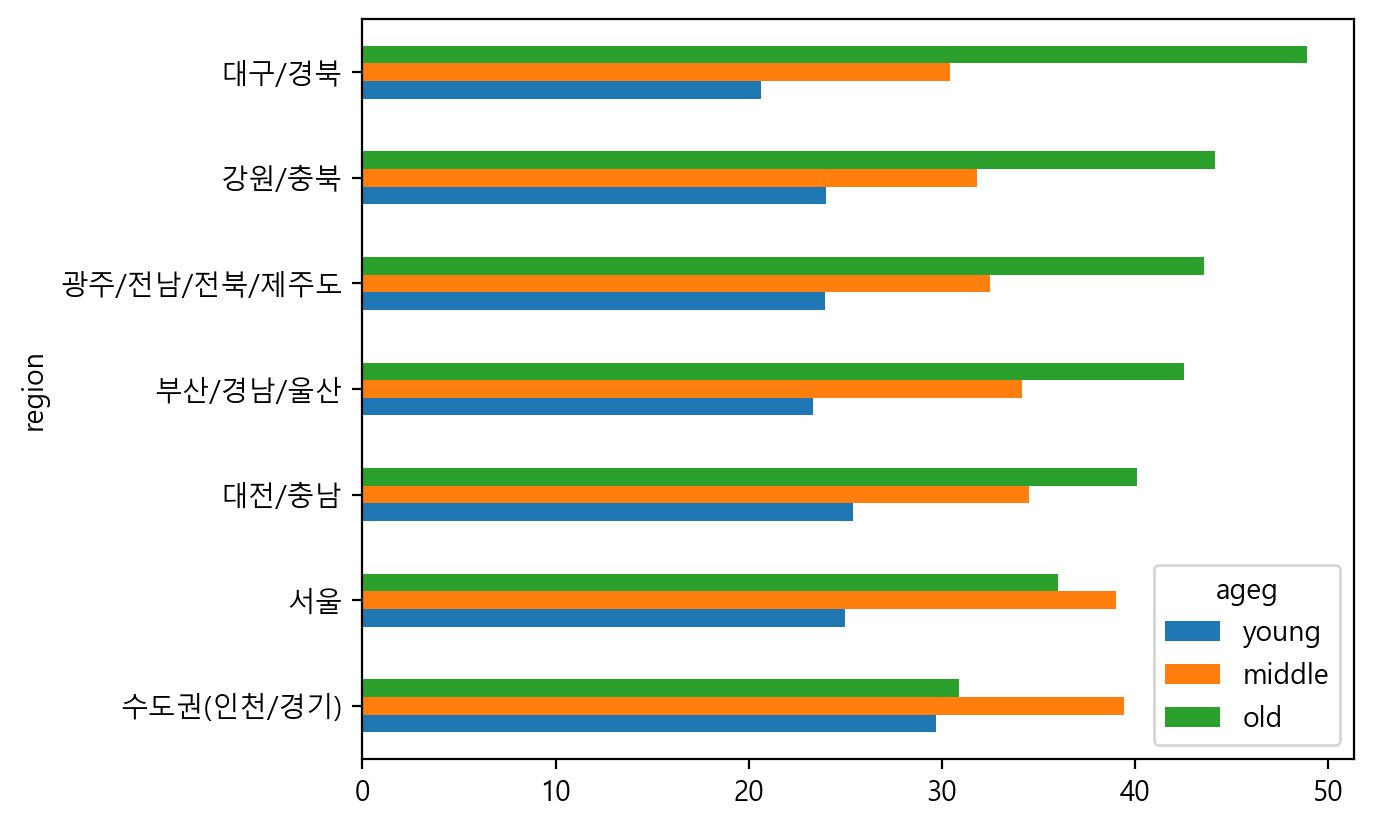

In [96]:
reorder_df.plot.barh()